# Introduction to Machine Learning

### Supervised Machine learning
Combine Inputs to produce predictions
Labels are given on Features. Labels say what the data represents, Features represent the data itsel
An email filter would be fed an Email (the feature) and a Label saying if it is or isnt spam
Models are the program that do the predicting, which represent the code

Labels can also be referred to as the thing we are predicting. They are the Y variable in simple linear regression. A label can be the animal in a picture, the meaning of an audio clip, the future price of something etc.  

An Example is a particular instance of data. Examples can be both Labeled and Unlabeled
An Example could be a vector as follows {features, label}:(x,y) or {features, ?}:(x,?)

Training is when a model is created and learns using labeled examples which allows a model to gradually learn the relationships between features and label
Inference is when a model is trained and is ued to make useful predictions against unlabeled examples

---



# Concepts of Machine Learning

## Regression vs Classification


### Regression
 Regression models predict continuous values, such as what is the value of a house given the features of the house and other nearby house prices
 What is the probability a user will click on this ad given their previous ad clicks
### Classification
 Classification is the prediciton of discrete values, such as "is this email spam or not" or "What animal is in this image"


 
 ## Common Terms


###Terms

**Loss** is a measure of how accurate a model is based on a prediction compared to a training examples label. A prediction of 2 but an example label of 4 means that there is a loss of 2. 

**L2 Loss Function** is a commonly used loss function, defined as the difference between true and predicted value squared. A real value of 4 and predicted value of 2 would create a loss functrion as follows

    loss = (4 - 2)^2 
    loss = 2^2 
    loss = 4

**Hyperparameters** are the configuration settings used to tune how the model is trained
Derivative of (y-y')^2 with respect to the weights and biases tells us how loss changes for a given example (where y is the correct label and y' is the prediction)

Repeatedly taking small steps in a direction that minimizes loss is called **Gradient Steps** (or negative gradient steps technically), which forms the basis of **Gradient Descent**.

Starting at a random value of **θ** for model parameters, the loss of the model is calculated given θ and the negative gradient is calculated to determine which direction to step towards, in order to reduce loss. This is repeated until the loss exceeds the local minimum (loss has gotten larger instead of smaller).

**Learning rate** is the rate at which a models hyperparameters are tweaked to reduce loss. smaller numbers result in a higher amount of computation, but can reach more accurate results, where as bigger numbers result in faster computation but the potential to overstep minimums and get stuck.

High learning rates can cause model divergence #RESEARCH

It is not feasible to compute loss over an entire dataset when the dataset contains lots of examples (1 million+)

a **Batch** is the number of examples you use to calculate the gradient in a single iteration. Batches are randomly sampled examples that are designed to reduce redundancy in the examples selected. 

**Stochastic Gradient Descent** is calculating loss using one example at a time

**Mini-batch Gradient Descent** is calculated using batches of 10-1000 examples at a time, with loss anf gradients averaged over the batch

### Step through Example

For a step-by-step walkthrough of Stochastic gradient descent we can use the following example:

x: 5
y: 6
b: 0
w: 0
learning rate: 0.5

using our linear regression model of 

    y' = b + wx
    
On the first step we make a prediction. 

    y' = 0 + 0(5)
    y' = 0
    
the loss here using L2 loss is 

    (5 - 0)^2 = 25

we then tweak b and w by the learning rate b=0.5 w=0.5 and repredict

    y' = 0.5 + 0.5(5)
    y' = 3
    
redetermine loss
 
    (6 - 3)^2 = 9 
    
etc. b = 1 w = 1
  
    y' = 1 + 1(5)
    y' = 6
    
    (6 - 6)^ 2 = 0
    
We have in 2 steps minimized loss from 25 to 0, hence the model is now trained with the parameters b and w set to their respective values of 1 and 1. When loss is minimized to it's lowest changing value over a given number of runs it is considered to have **Converged** (in the above example, we cant change the number any more without increasing the loss since loss is always positive) 

Other values that can also make this work however, are 2.5 and 0.5 or 4 and 0.2, which all correctly get an answer of 6, but depending on the learning rate can be quite different when applied to other features.


# Pandas


##Basic Concepts

**Series**  is a single column of values 

**dataframes** are comparable to a relational database table, with rows and named columns. A Dataframe contains 1 or more Series, and a name for each series

Series can be created by using the Series object



In [0]:
VictoriaCityNames = pd.Series(['Geelong','Melbourne','Ballarat','Bendigo'])
CityPopulations = pd.Series([300000,1200000,200000,200000])


Dataframes can be created by passing in a `dict` mapping a string (as a name) to a series into the DataFrame object constructor, i.e.

In [0]:
ExampleDataFrame = pd.DataFrame({'VictoriaCityNames': VictoriaCityNames, 'CityPopulations': CityPopulations})
ExampleDataFrame.describe()

,CityPopulations
count,4.0
mean,475000.0
std,485626.7
min,200000.0
25%,200000.0
50%,250000.0
75%,525000.0
max,1200000.0


Most common operations for creating dataframes however, is by reading from a file and inserting into a dataframe. 

In [0]:
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


pandas also includes a powerful Graphic tool as well.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f902afb4978>]],
      dtype=object)

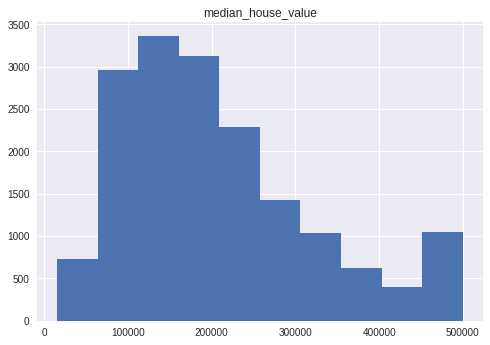

In [0]:
california_housing_dataframe.hist('median_house_value')

##Accessing Data
You can access dataframe data using python dict/list operations

In [0]:
VictoriaCityNames = pd.Series(['Geelong','Melbourne','Ballarat','Bendigo'])
CityPopulations = pd.Series([300000,1200000,200000,200000])

ExampleDataFrame = pd.DataFrame({'VictoriaCityNames': VictoriaCityNames, 'CityPopulations': CityPopulations})

print(type(ExampleDataFrame['VictoriaCityNames']))
print(ExampleDataFrame['VictoriaCityNames'])
print(type(ExampleDataFrame['VictoriaCityNames'][2]))
print(ExampleDataFrame['VictoriaCityNames'][2])
print(type(ExampleDataFrame['VictoriaCityNames'][0:2]))
print(ExampleDataFrame['VictoriaCityNames'][0:2])

<class 'pandas.core.series.Series'>
0      Geelong
1    Melbourne
2     Ballarat
3      Bendigo
Name: VictoriaCityNames, dtype: object
<class 'str'>
Ballarat
<class 'pandas.core.series.Series'>
0      Geelong
1    Melbourne
Name: VictoriaCityNames, dtype: object


##Manipulating Data
Standard Language arithmatic can be applied to an entire series

In [0]:
CityPopulations = pd.Series([300000,1200000,200000,200000])
CityPopulations /= 1000
CityPopulations.head()

np.log(CityPopulations)

0   5.7
1   7.1
2   5.3
3   5.3
dtype: float64

For more complex single-column transformations the series.apply fucntion can be used. this works similarly to the funcitonal .Map() operation and accepts a lambda function as an argument to apply to each value. 

To create a new series based on if a population is over one million, the following can be used

In [0]:
CityPopulations = pd.Series([300000,1200000,200000,200000])

Populations_Of_Over_One_Million = CityPopulations.apply(lambda val: val > 1000000)
print(Populations_Of_Over_One_Million)

0    False
1     True
2    False
3    False
dtype: bool


##Task 1
Modify the cities table to show a boolean value if both the city is named after a saint, and the city has an area greater than 50 square miles

In [0]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities['NamedAfterASaintAndGreaterThan50SquareMiles'] = (cities['Area square miles'] > 50.0) & (cities['City name'].apply(lambda name: name.lower().startswith('san')))
print(cities['NamedAfterASaintAndGreaterThan50SquareMiles'])
print(cities)

0    False
1     True
2    False
Name: NamedAfterASaintAndGreaterThan50SquareMiles, dtype: bool
       City name  Population  Area square miles  Population density  \
0  San Francisco      852469               46.9             18187.9   
1       San Jose     1015785              176.5              5754.2   
2     Sacramento      485199               97.9              4955.1   

   NamedAfterASaintAndGreaterThan50SquareMiles  
0                                        False  
1                                         True  
2                                        False  


##Indexes
Indexes are the unique identifiers applied to both series items and dataframe rows.

Pandas by default assigns index values reflecting the ordering of source data. Once created, the index values are stable/immutable and do not change when data is reordered.

In [0]:
city_names.index
cities.index


#you can manually reorder rows using the reindex() method
cities.reindex([2,0,1])
cities.head()

cities = cities.reindex(np.random.permutation(cities.index))
cities.head()

cities = cities.reindex([3,0,1,2])
cities.head()


,City name,Population,Area square miles,Population density,NamedAfterASaintAndGreaterThan50SquareMiles
3,NaN,nan,nan,nan,NaN
0,San Francisco,852469.0,46.9,18187.9,False
1,San Jose,1015785.0,176.5,5754.2,True
2,Sacramento,485199.0,97.9,4955.1,False


# Tensorflow





## Tensorflow Programming Concepts

#### Abstract Concepts

Tensorflow is based on the concept of Tensors, which are n dimensional arrays of data

*   A **scalar** is a 0 dimensional array (0th order tensor). Example: 1000, 'Hello, world', 3.1415
*   A **Vector** is a 1 dimensional array (1st order tensor). Example, [1,2,3,4,5], ['Hello','World']
*   A **Matrix** is a 2 dimensional array (2nd order tensor). Example [1,2,3][4,5,6], ['Hello']['World']

Matrices are ordered by stack-row-column, so a 2 stack x 2 rows x 2  columns matrix would be created like  [[[1,1,1],[1,1,1]],[[1,2,3],[4,5,6]]] and look like below

[[[1 1 1]
  [1 1 1]]

 [[1 2 3]
  [4 5 6]]]

TensorFlow **Operations** perform basic CRUD on these tensors, and most lines of code ina typical tensorflow program are operations.

A tensorflow **Graph** is a graph data structure. A graph's nodes are operations. Many Tensorflow programs consist of a single graph, but Tensorflow programs may create multiple graphs.

A graphs nodes are operations, a graphs edges are tensors. Tensors flow through the graph, manipulated at each node by an operation. The output tensor of one operation will become an input tensor to the next subsequent operation. TensorFlow implements a **Lazy Execution model**, meaning nodes are computed Ad-Hoc based on the needs of associated nodes.

Tensors can be stored in the graph as **constants** or **variables**. These are pretty self-explanatory in terms of values.
Constants and Variables are, however, more operations in th graph. A constant is an operation that always returns the same tensor value. A variable is an operation that will return whichever tensor has been assigned to it.



####Feature Columns


Feature columns act as a representation of data for tensorflow, and relate data by creating feature columns using the same name key as feature data

i.e. given a dataset such as below

|Col1|Col2|Col3|Col4|Col5|Col1xCol2|
|---|---|---|---|---|---|
|1|2|1|1980|'Hello'|
|1|1|2|2001|'World'|

you would create feature columns such as below

    #Create some numerical columns
    Col_1_feature = tf.feature_column.numerical_column(key="Col1")
    Col_2_feature = tf.feature_column.numerical_column(key="Col2")
    Col_3_feature = tf.feature_column.numerical_column(key="Col3")
    Col_4_feature = tf.feature_column.numerical_column(key="Col4")
    
    #This bins the data in column 4 into 4 discrete bin values, before and up to 1950, between 1950 and 1980, 1980 to 2000, 2000 to 2010, and 2010 and after
    Col_4_bucket_feature = tf.feature_column.bucketized_column(source_column=Col_4_feature,boundaries=[1950,1980,2000,2010])
    
    

####Pseudocode Examples

A **constant** can be defined as 

    x = tf.constant(5.5)
    
and a **variable** can be defined as

    y = tf.Variable([5])
    
Variables can be assigned on construction, or using the **.assign()** function

    y = y.assign([5])
    
---
Tensorflow graphs must run in a Tensorflow Session. 

sessions can be defined using the following
    
    with tf.Session() as sess:
      initialization = tf.global_variables_initializer()
      print(y.eval())
      
When working with variables, **global_variables_initializer** MUST be called at the start of the session

###A Simple Tensorflow Program

This application will use Tensorflow, MatPlotLib for dataset visualization, numpy for low level numerical operations, and pandas for higher level numerical operations. This program will create a simple graph and sum the values of a couple of constants

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

g = tf.Graph()

with g.as_default():
  x = tf.constant(8)
  y = tf.constant(5)
  z = tf.constant(4)
  xy_sum = tf.add(x,y)
  xy_sum = tf.add(xy_sum, z)
  
  with tf.Session() as sess:
    print("Value of Sum: ",xy_sum.eval())

Value of Sum:  17


#### ***Optional - *** Displaying a Mandelbrot Set

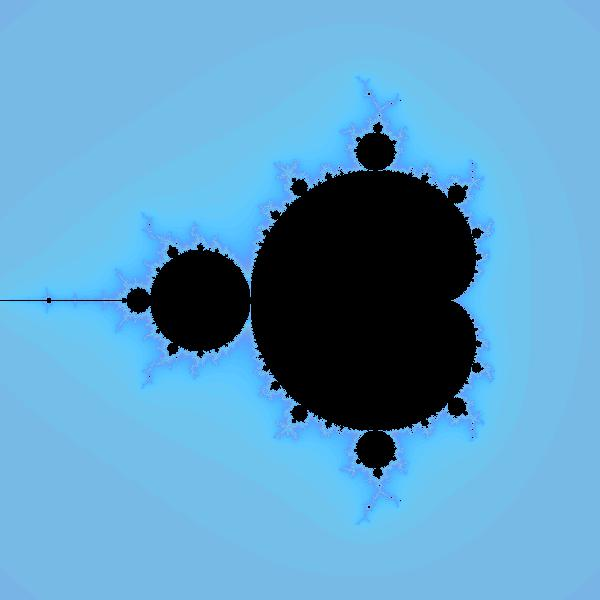

In [0]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  a_cyclic = (6.28*a/20).reshape(list(a.shape)+[1])
  img = np.concatenate([100+20*np.cos(a_cyclic),
                       180+20*np.sin(a_cyclic),
                        250-20*np.cos(a_cyclic)],2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a,0,255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f,fmt)
  display(Image(data=f.getvalue()))

  
with tf.Session() as sess:

  #Create an matrix grid, from -1.5 to 1.5 in steps of 0.005, and a grid from -1 to 1 in steps of 0.005
  Y,X = np.mgrid[-1.5:1.5:0.005,-2:1:0.005]

  #Set Z to a complex (imaginary number) type
  Z = X+1j*Y

  xs = tf.constant(Z.astype(np.complex64))
  zs = tf.Variable(xs)
  ns = tf.Variable(tf.zeros_like(xs,tf.float32))

  tf.global_variables_initializer().run()

  zs_ = zs*zs + xs
  not_diverged = tf.abs(zs_) < 4

  step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    )

  for i in range(200): 
    step.run()

  DisplayFractal(ns.eval())

##Creating and Manipulating Tensors

###Tensor Shapes and Manipulation

A simple program using the TensorFlow api to perform operations on Tensors

In [0]:
import tensorflow as tf

with tf.Graph().as_default():
  #Defines a 1st order tensor of 6 prime numbers
  vector_of_prime_numbers = tf.constant([2,3,5,7,11,13],dtype=tf.int32)
  
  #tf.ones creates an array of ones in the shape of the first parameter
  vector_of_ones = tf.ones(vector_of_prime_numbers.shape,dtype=tf.int32)
    
  #sum the two vectores
  primes_plus_one = tf.add(vector_of_prime_numbers, vector_of_ones)
    
  with tf.Session() as sess:
    print(primes_plus_one.eval())
    print(vector_of_ones.eval())
  

[ 3  4  6  8 12 14]
[1 1 1 1 1 1]


####Tensor Shapes
a program displaying how to check the shape of a tensor

In [0]:
with tf.Graph().as_default():
  #0 dimensional tensor (a scalar)
  scalar = tf.zeros([]) 
  #1st dimensional tensor with 3 elements
  vector = tf.zeros([3])
  #2nd dimensional tensor with 2 rows and 3 columns
  matrix = tf.zeros([2,3])
  
  with tf.Session() as sess:
    print('scalar has shape', scalar.get_shape(), 'and value: \n', scalar.eval())
    print('vector has shape', vector.get_shape(), 'and value: \n', vector.eval())
    print('matrix has shape', matrix.get_shape(), 'and value: \n', matrix.eval())

scalar has shape () and value: 
 0.0
vector has shape (3,) and value: 
 [0. 0. 0.]
matrix has shape (2, 3) and value: 
 [[0. 0. 0.]
 [0. 0. 0.]]


####Multiplying tensors
A program to multiply 2 matrices by using the cross-product of the 2 matrices.

In [0]:
with tf.Graph().as_default():
  x = tf.constant([[5,2,4,3],[5,1,6,-2],[-1,3,-1,-2]],dtype=tf.int32)
  y = tf.constant([[2,2],[3,5],[4,5],[1,6]],dtype=tf.int32)
  
  matrix_multiply_result = tf.matmul(x,y)
  
  with tf.Session() as sess:
    print(matrix_multiply_result.eval())

[[35 58]
 [35 33]
 [ 1 -4]]


####Reshaping tensors
A program to reshape an 8x2 tensor into a few different tensor shapes, to allow for multiplication 

In [0]:
import tensorflow as tf
with tf.Graph().as_default():
  
  matrix = tf.constant([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16]])
  
  reshaped_matrix_2x8 = tf.reshape(matrix,[2,8])
  reshaped_matrix_4x4 = tf.reshape(matrix,[4,4])
  reshaped_matrix_2x2x4 = tf.reshape(matrix,[2,2,4])
  reshaped_matrix_1x16 = tf.reshape(matrix,[16])
   
  with tf.Session() as sess:
    print('\nOriginal 8x2 Matrix: \n',matrix.eval())
    print('\nReshaped 2x8 Matrix: \n',reshaped_matrix_2x8.eval()) 
    print('\nReshaped 4x4 Matrix: \n',reshaped_matrix_4x4.eval())
    print('\nReshaped 2x2x4 Matrix: \n',reshaped_matrix_2x2x4.eval())
    print('\nReshaped 1x16 Matrix: \n',reshaped_matrix_1x16.eval())


Original 8x2 Matrix: 
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]

Reshaped 2x8 Matrix: 
 [[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]]

Reshaped 4x4 Matrix: 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Reshaped 2x2x4 Matrix: 
 [[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]]

Reshaped 1x16 Matrix: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


###Task from 'Creating and Manipulating tensors' - Reshape Two tensors
This is a task from the google pre-made colab sheet, that asks for users to multiply two vectors using matrix multiplication

    a = tf.constant([5, 3, 2, 7, 1, 4])
    b = tf.constant([4, 6, 3])
    
    

In [0]:
  import tensorflow as tf 
  with tf.Graph().as_default():
    
    a = tf.constant([5, 3, 2, 7, 1, 4])
    b = tf.constant([4, 6, 3])
    
    a_reshaped = tf.reshape(a,[2,3])
    b_reshaped = tf.reshape(b,[3,1])
    
    c = tf.matmul(a_reshaped, b_reshaped)
    
    with tf.Session() as sess:
      print(a_reshaped.eval())
      print(b_reshaped.eval())
      print(c.eval())

To solve this, I reshaped the first vector into a 2 row x 3 column matrix, and the second vector into a 3 row x 1 column matrix, then used tf.matmul() to multiply the two matrices into a 2 row x 1 column matrix

###Variables, Intialization, and Assignment

Tensorflow's Variable objects are objects whose values are variable (hence the name)

In [0]:
import tensorflow as tf 
with tf.Graph().as_default():
  v = tf.Variable([3])
  w = tf.Variable(tf.random_normal([1],mean=1.0,stddev=0.35))
  
  with tf.Session() as sess:
    try:
      v.eval()
    except tf.errors.FailedPreconditionError as e:
      print('Caught Expected Error: ', e)
    
    initialization = tf.global_variables_initializer()
    sess.run(initialization)
    
    print('',v.eval())
    
    assignment = tf.assign(v,[7])
    sess.run(assignment)
    
    print('',v.eval())
    print('',w.eval())

Caught Exprected Error:  Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]
 [3]
 [7]
 [1.3906485]


###Task from 'Creating and Manipulating tensors'  - Simulate 10 rolls of 2 dice

Create a simple tensorflow application to generate random dicerolls 

In [0]:
import tensorflow as tf

def GetVerticalSlice(tensor, column=0,row=1, name=None):
  #with tf.name_scope(name,"GetVerticalSlice",tensor) as scope:
  #a = tf.convert_to_tensor(tensor,name="p_a")
  return tf.slice(tensor, [0,column],[-1,row])

with tf.Graph().as_default():
  #Way 1: the way the solution explains, using 2 seperate 10x1 2d tensors initialised using the tf.random_uniform() function
  die_1 = tf.Variable(tf.random_uniform([10,1],minval=1, maxval=6, dtype=tf.int32))
  die_2 = tf.Variable(tf.random_uniform([10,1],minval=1, maxval=6, dtype=tf.int32))
  
  #Way 2: Byren's alternate way by initializing a 10x2 2d tensor, and calculating the values based on a vertical slice 
  die_double = tf.Variable(tf.random_uniform([10,2],minval=1,maxval=7,dtype=tf.int32))
  
  #Way 3: An alternate method for n dice in a rank 2 tensor
  die_double_way = tf.Variable(tf.random_uniform([10,5],minval=1,maxval=7,dtype=tf.int32))
  
  with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    #Way 1
    die_sum = tf.add(die_1,die_2)   
    die_result = tf.concat(values=[die_1,die_2,die_sum],axis=1)
    print(die_result.eval())
    #Way 2
    die_sum_double = tf.add(GetVerticalSlice(tensor=die_double,column=0),GetVerticalSlice(tensor=die_double,column=1)) #tf.slice(die_double, [0,0],[-1,1])
    die_double_concat = tf.concat(values=[die_double,die_sum_double],axis=1)
    print(die_double_concat.eval())
    #Way 3
    die_double_concat_way3 = tf.concat(values=[die_double_way,tf.reshape(tf.reduce_sum(die_double_way,1),[-1,1])],axis=1)
    print(die_double_concat_way3.eval())
    
  

[[ 5  1  6]
 [ 5  1  6]
 [ 4  1  5]
 [ 5  5 10]
 [ 2  1  3]
 [ 4  2  6]
 [ 1  3  4]
 [ 4  2  6]
 [ 3  2  5]
 [ 5  3  8]]
[[ 3  2  5]
 [ 5  4  9]
 [ 6  1  7]
 [ 5  4  9]
 [ 6  1  7]
 [ 2  5  7]
 [ 5  1  6]
 [ 4  5  9]
 [ 5  5 10]
 [ 4  6 10]]
[[ 3  5  4  4  3 19]
 [ 4  1  3  4  1 13]
 [ 1  6  5  5  5 22]
 [ 3  5  1  4  5 18]
 [ 1  3  5  3  6 18]
 [ 6  5  1  6  5 23]
 [ 2  3  2  3  5 15]
 [ 6  1  3  4  4 18]
 [ 3  2  3  1  1 10]
 [ 1  3  6  5  1 16]]


##Synthetic Features and Outliers  - Part I

### LinearRegressors and their applications
the below code sample sets up the application. This application will attempt to predict the median house value based on the features of an unlabeled example. We will use supervised training.

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm, gridspec, pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Now for our dataset. We'll be using a pandas dataframe to store our data

In [0]:
california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()
#california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


It's now valuable for our model to randomize our data, and make our median house value a few magnitudes smaller to make learning rates better

In [0]:
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10736,-120.7,38.5,10.0,1783.0,337.0,638.0,262.0,2.6,116.7
15770,-122.4,37.8,52.0,1288.0,309.0,437.0,272.0,6.3,500.0
16085,-122.5,37.7,50.0,1441.0,283.0,1159.0,286.0,4.5,233.7
13702,-122.0,38.4,16.0,2509.0,366.0,1043.0,339.0,6.1,173.4
12343,-121.5,38.5,31.0,3089.0,585.0,1366.0,561.0,4.3,160.3


###Define Features and configure Feature Columns
**Categorical Data** is textual data, such as a "fiction" or "Apartment/Unit" or "Melbourne"

**Numerical Data** is data that is or you wish to treat as a number. Numerical data can be treated as Categorical data, but the reverse rarely occurs. An example of this is Post Codes which appear numerical but are categorical in nature. In regards to data you wish to treat as a number, an example could be hexidecimal representations of a number such as #ff00ff representing the number #16711935

a features data type is indicated by using a construct called a **feature column**. feature columns store a description of the feature data, and do not contain the feature data itself.


We can start by using the total_rooms feature


In [0]:
#Define the input feature and assign it to a variable. Make sure to Double square bracket the chosen features, since we need a DataFrame, not a Series.
#This will cause DEFINITE HEADACHES IN THE FUTURE
my_feature = california_housing_dataframe['total_rooms']
print(type(my_feature))
      
my_feature = california_housing_dataframe[['total_rooms']]
print(type(my_feature))
      
#Configure a numeric feature column called 'Total_Rooms_FC'
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


now we have to define our target. Our target is the feature we wish to predict given an example

In [0]:
targets = california_housing_dataframe['median_house_value']

Now we can create the Linear Regressor, but first a note on a concept called **Exploding Gradients** and their inverse, **Vanishing Gradients**.

Error gradients are the direction and magnitude a model should take during training of a neural network, and are used to update the weight and bias of the model in the correct direction and by the right amount.

in deep networks or recurrent neural networks, error gradients can accumulate and result in very large gradients, requiring very large changes to weights and biases, and in turn destabilise the network. At an extreme, weight values can overflow ito NaN values.

By repeatedly multiplying gradients through the layers of a network to be larger than 1.0, we can get explosive changes to the gradient, hence the name. 

The inverse to this is Vanishing Gradients, which is where the changes made to a models weights have such little impact that a model cant learn from them.


####(Old text)

When our Linear regression model learns, we are making changes to parameters to produce a more accurate model.
However, these parameter changes can multiply to be very small (vanishing gradients) or very large (explosive gradients).
On the face of an extremely steep cliff, the system may think that an even greater step is required, causing a jump off the cliff alltogether.
An obvious solution to this is to have a very low learning rate, however this increases computation massively.
The other solution to this is to clip the maximum change in values. 
This prevents the system from overstepping changes to parameters that could result in making these massive jumps off sharpp changes in gradient

###Code

In [0]:
class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 1000;
    #Number of iterations to perform to calculate loss
    self.Steps = 100;
    #Reporting period to show the number of times to report
    self.Periods = 10;
    #Learning Rate
    self.learning_rate = 0.00001
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

#Create a GradientDescentOptimizer which uses Mini-Batch Stochastic Gradient Descent (SGD). I pass in my HyperParameters predefined learning_rate value 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=hp.learning_rate)
#By using the clip_gradients_by_norm() function we are clipping the gradient change rate to prevent exploding gradients
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, hp.ClipRange)

linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_columns, optimizer=optimizer) 


Now we create our input function. This takes a list of a features and targets

In [0]:

def ml_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels


Now we can train our model! here we input the Features and the Targets into our input function

In [0]:
_ = linear_regressor.train(
    input_fn = lambda:ml_input_fn(my_feature, targets),
    steps=100
)
print(type(_))

<class 'tensorflow.python.estimator.canned.linear.LinearRegressor'>


This should now produce a model that we can manipulate.


In [0]:
#Create a lambda function to call the input function for prediction
prediction_input_fn = lambda:ml_input_fn(my_feature,targets,num_epochs=1,shuffle=False)
#call predict on the linear_regressor to make predictions
predictions = linear_regressor.predict(input_fn=prediction_input_fn)
print(type(predictions))


#format predictions into a numpy array to calculate error metrics
predictions = np.array([item['predictions'][0] for item in predictions])

#Use scikit-learn to calculate the mean squared error on predictions vs targets.
mean_squared_error = metrics.mean_squared_error(predictions,targets)
root_mean_squared_error = math.sqrt(mean_squared_error)

min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_dif = max_house_value - min_house_value

print("min. median house value: %0.3f" % min_house_value)
print("max. median house value: %0.3f" % max_house_value)
print("diff: %0.3f" % min_max_dif)
print("root mean squared error: %0.3f" % root_mean_squared_error)

<class 'generator'>
min. median house value: 14.999
max. median house value: 500.001
diff: 485.002
root mean squared error: 235.105


Well if we look at the root mean squared error vs the real values, our error rate is damn high (over 50% of the target values are covered in our error rate. that adds a lot of room for error!)

so to fix this we can start looking at our predictions vs our targets in a dataframe to get a better idea of how they matched up

In [0]:
calibration_pd = pd.DataFrame()
calibration_pd["predictions"] = pd.Series(predictions)
calibration_pd["targets"] = pd.Series(targets)
calibration_pd.describe()

,predictions,targets
count,17000.0,17000.0
mean,2.6,207.3
std,2.2,116.0
min,0.0,15.0
25%,1.5,119.4
50%,2.1,180.4
75%,3.2,265.0
max,37.9,500.0


We might be better suited to draw a graph to represent our learned model to see what's going on. Linear regressors on az single feature can be drawn as a line mapping input x to output y. We need a sample of data first

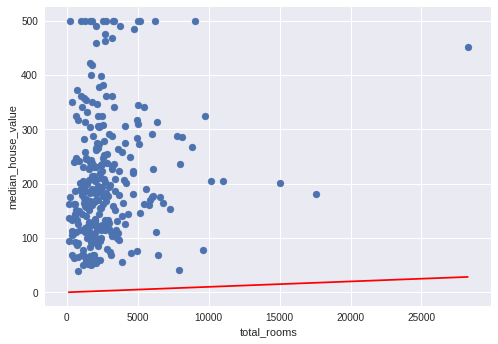

In [0]:
sample = california_housing_dataframe.sample(n=300)
sample.describe()

x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

y_0 = weight * x_0 + bias
y_1 = weight * x_1 + bias

plt.plot([x_0,x_1],[y_0,y_1],c="r")
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

plt.scatter(sample["total_rooms"], sample["median_house_value"])

plt.show()

## Synthetic features and Outliers - Part II
create a synthetic feature (a feature derived from two other features) and use this feature in a linear regression model.

###Code

Training model...
RMSE (on training data):
  period 00 : 235.11
  period 01 : 232.70
  period 02 : 230.31
  period 03 : 227.96
  period 04 : 225.63
  period 05 : 223.32
  period 06 : 221.05
  period 07 : 218.81
  period 08 : 216.60
  period 09 : 214.42
  period 10 : 212.27
  period 11 : 210.16
  period 12 : 208.09
  period 13 : 206.04
  period 14 : 204.04
  period 15 : 202.07
  period 16 : 200.15
  period 17 : 198.26
  period 18 : 196.42
  period 19 : 194.62
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,52.9,207.3
std,43.6,116.0
min,0.0,15.0
25%,29.2,119.4
50%,42.5,180.4
75%,63.0,265.0
max,758.7,500.0


Final RMSE (on training data): 194.62


,predictions,targets
0,31.9,66.9
1,37.1,80.1
2,37.3,85.7
3,47.6,73.4
4,38.9,65.5
...,...,...
16995,38.8,111.4
16996,52.7,79.0
16997,57.8,103.6
16998,50.0,85.8


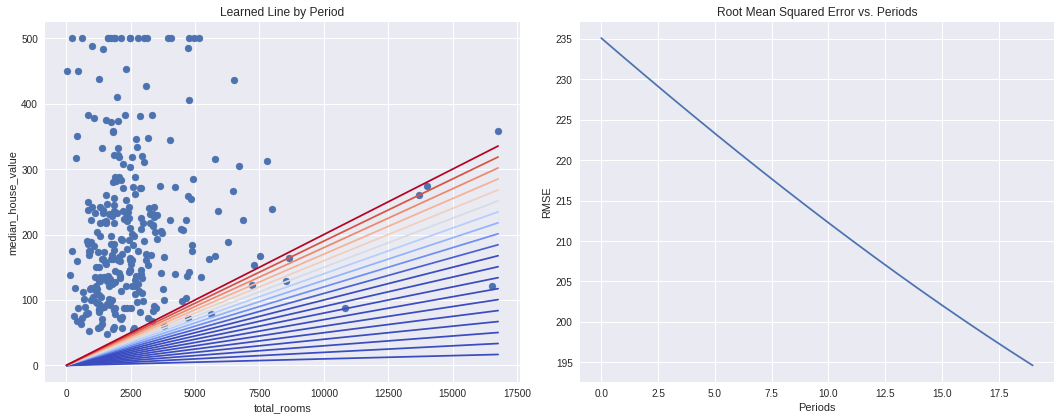

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe

class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 500;
    #Number of iterations to perform to calculate loss
    self.Steps = 2000;
    #Reporting period to show the number of times to report
    self.Periods = 20;
    #Learning Rate
    self.Learning_rate = 0.00001
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

def ml_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels
  
def train_model(hp, input_data_frame ,input_feature_name,label_name):
  periods = hp.Periods
  steps_per_period = hp.Steps / periods
  
  feature_name = input_feature_name
  feature_data = input_data_frame[[feature_name]].astype('float32')
  targets = input_data_frame[label_name].astype('float32')
  
  training_input_fn = lambda: ml_input_fn(feature_data, targets, batch_size=hp.BatchSize)
  predict_training_input_fn = lambda:ml_input_fn(feature_data, targets, num_epochs=1, shuffle=False)
  
  feature_columns = [tf.feature_column.numeric_column(feature_name)]
  
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=hp.Learning_rate)
  optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, hp.ClipRange)
  
  linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
      optimizer=optimizer
  )
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(label_name)
  plt.xlabel(feature_name)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[feature_name], sample[label_name])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]
  
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
      metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[feature_name].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % feature_name)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
    
    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[feature_name].max()),
                           sample[feature_name].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Create a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
  
  return calibration_data
  
train_model(
    hp,
    california_housing_dataframe,
    'total_rooms',
    'median_house_value'    
)

###Create a synthetic feature
let's create a feature that takes the population and the number of people

Training model...
RMSE (on training data):
  period 00 : 198.66
  period 01 : 165.88
  period 02 : 142.97
  period 03 : 131.73
  period 04 : 131.14
  period 05 : 132.01
  period 06 : 131.57
  period 07 : 131.26
  period 08 : 130.91
  period 09 : 130.45
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,207.4,207.3
std,88.4,116.0
min,59.0,15.0
25%,172.7,119.4
50%,204.4,180.4
75%,231.3,265.0
max,4231.1,500.0


Final RMSE (on training data): 130.45


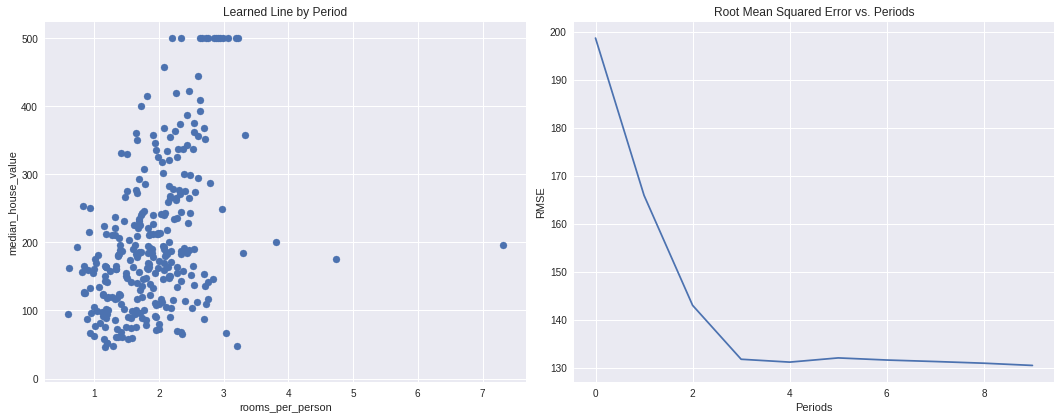

In [0]:
class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 50;
    #Number of iterations to perform to calculate loss
    self.Steps = 2000;
    #Reporting period to show the number of times to report
    self.Periods = 10;
    #Learning Rate
    self.Learning_rate = 0.1
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

california_housing_dataframe['rooms_per_person'] = (california_housing_dataframe['total_rooms'] / california_housing_dataframe['population'])
_ = california_housing_dataframe['rooms_per_person'].apply(lambda x: min(x,5))

CalibrationData = train_model(
    hp,
    california_housing_dataframe,
    'rooms_per_person',
    'median_house_value'    
)



###Identify Outliers


Training model...
RMSE (on training data):
  period 00 : 198.34
  period 01 : 162.30
  period 02 : 132.02
  period 03 : 112.31
  period 04 : 108.10
  period 05 : 107.83
  period 06 : 107.80
  period 07 : 107.76
  period 08 : 107.71
  period 09 : 107.69
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,205.2,207.3
std,52.4,116.0
min,51.6,15.0
25%,171.7,119.4
50%,205.2,180.4
75%,233.7,265.0
max,449.6,500.0


Final RMSE (on training data): 107.69


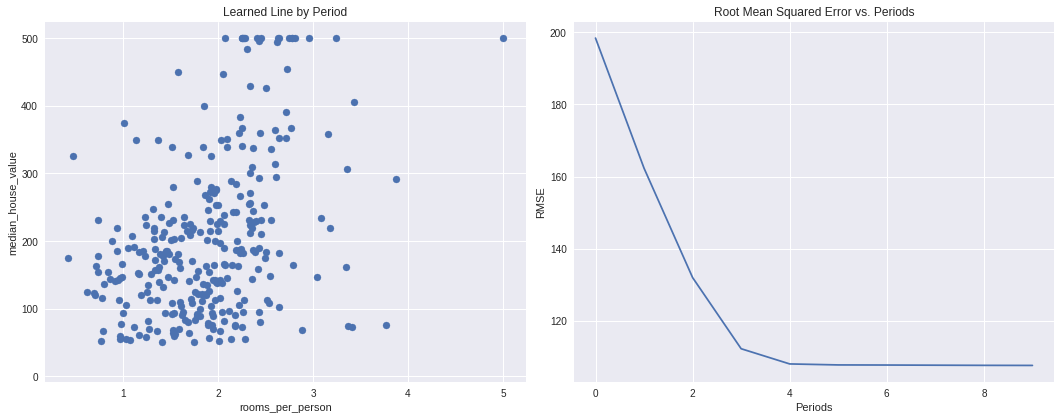

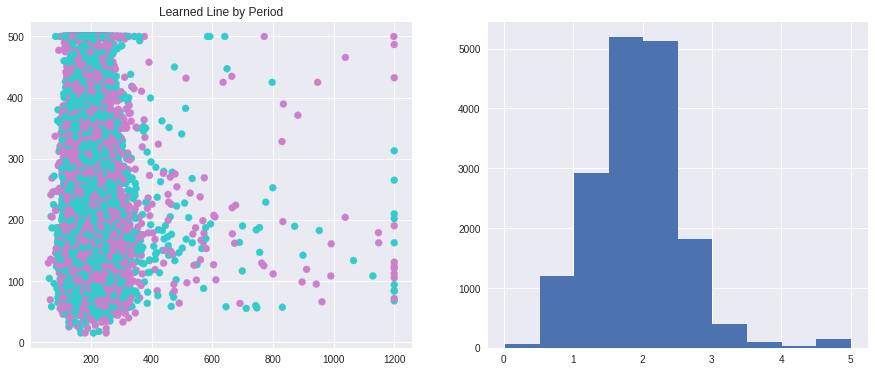

In [0]:

california_housing_dataframe['rooms_per_person'] = (california_housing_dataframe['total_rooms'] / california_housing_dataframe['population'])

california_housing_dataframe['rooms_per_person'] = california_housing_dataframe['rooms_per_person'].apply(lambda x: min(x,5))


CalibrationData = train_model(
    hp,
    california_housing_dataframe,
    'rooms_per_person',
    'median_house_value'    
)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("Learned Line by Period")
plt.scatter(SanitizedPred,CalibrationData['targets'],c=[[0.2,0.8,0.8],[0.8,0.5,0.8]])
plt.subplot(1, 2, 2)
_ = california_housing_dataframe["rooms_per_person"].hist()



##Tweak the model Hyperparameters

Just for simplicity, we should consolidate all the previous code into a single function. 

Training Model...
RMSE:
  period 00 : 235.11
  period 01 : 232.70
  period 02 : 230.31
  period 03 : 227.96
  period 04 : 225.63
  period 05 : 223.32
  period 06 : 221.05
  period 07 : 218.81
  period 08 : 216.60
  period 09 : 214.42
Model training finished.
[235.1053979778442, 232.69607940393234, 230.31254939560995, 227.95559998201082, 225.6260435362979, 223.32476239810487, 221.05263964183362, 218.81058332652694, 216.59952821080037, 214.42043245064983]


,predictions,targets
count,17000.0,17000.0
mean,26.4,207.3
std,21.8,116.0
min,0.0,15.0
25%,14.6,119.4
50%,21.3,180.4
75%,31.5,265.0
max,379.4,500.0


Final RMSE (on training data): 214.42


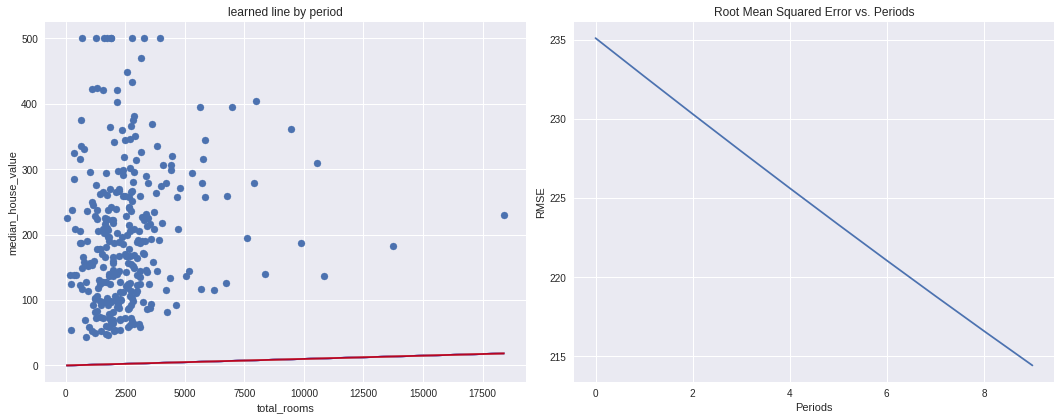

In [0]:
class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 500;
    #Number of iterations to perform to calculate loss
    self.Steps = 500;
    #Reporting period to show the number of times to report
    self.Periods = 10;
    #Learning Rate
    self.Learning_rate = 0.00002
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

def ml_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels


def Train_Model(hp, input_feature="total_rooms"):
  _steps_per_period = hp.Steps / hp.Periods
  
  _feature_data = california_housing_dataframe[[input_feature]]
  _my_label = "median_house_value"
  _targets = california_housing_dataframe[_my_label]
  
  training_input_fn = lambda:ml_input_fn(_feature_data,_targets,hp.BatchSize)
  prediction_input_fn = lambda:ml_input_fn(_feature_data,_targets,num_epochs=1,shuffle=False)
  
  _optimizer = tf.train.GradientDescentOptimizer(learning_rate=hp.Learning_rate)
  _optimizer = tf.contrib.estimator.clip_gradients_by_norm(_optimizer,hp.ClipRange)
  
  feature_columns = [tf.feature_column.numeric_column(input_feature)]
  
  _linear_regressor = tf.estimator.LinearRegressor(feature_columns=feature_columns, optimizer=_optimizer)
  
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plt.title('learned line by period')
  plt.ylabel(_my_label)
  plt.xlabel(input_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[input_feature], sample[_my_label])
  colors=[cm.coolwarm(x) for x in np.linspace(-1,1,hp.Periods)]

  print("Training Model...")
  print("RMSE:")
  root_mean_squared_errors = []
  
  for per in range(0,hp.Periods):
    _linear_regressor.train(
        input_fn=training_input_fn, 
        steps=_steps_per_period
    )
    
    predictions = _linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions,targets))
    print("  period %02d : %0.2f" % (per, root_mean_squared_error))
    
    root_mean_squared_errors.append(root_mean_squared_error)
    
    y_extents = np.array([0,sample[_my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
    
    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[input_feature].max()),
                           sample[input_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[per]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)
  print(root_mean_squared_errors)
  
    # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
  
Train_Model(hp)#,'population')

  

Here we can see... the line is no-where near. 

## Generalization

###Overfitting
**Overfitting** is where a model becomes overly complex given a dataset, and cannot adapt properly to predictions based on non-training data. 

overtfitted models will usually have a rigorously specified set of weights and biases, to build a model that fits training data exactly, but given new data will fall/collapse/ make a bad decision

overfitting is best solved with Occams Razor as the solution. Overfitting occurs due to complexity, Occams Razor is the idea ofkeeping things as simple as possible.

A solution to potentially fixing the overfitting model is by dividing a dataset into a **Training Set** and a **Testing Set** (given that a test set is large enough and you use randomised test data).

###Generalization
generalization is the process of making a model better at predicting all data rather than just training data. assumptions used to guide generalization are as follows:

draw examples **independently and identically (i.i.d)** at random from the distribution. e.g. choose examples that dont influence each other, attempt random variable selection

the distribution is **stationary**, i.e. the the distribution doesnt changewithin the dataset.

examples are drawn from partitions from the **same distribution**.

in practice however, these assumptions can be violated, i.e.

a model that chooses ads to display would choose ads based on previously seen ads, which breaks the i.i.d assumption

a model that uses retail sales information would change over the holiday season to reflect the change in user purchases.

##Training, Test Sets, and Validation

###Testing and training sets
the idea of this is to use a smaller percentage of the total dataset for just testing, and the remainder for training. Ratio's such as 90/10 to 75/25 are all good, all that matters is that the test set is large enough to yeild statistically meaningful results, and is representative of the dataset as a whole (i.e. you pick random data for testing).

do not EVER train on test data, it removes the utility of the training/test split methodology. Always check this before celebrating a sucessful model.

a generalized model will still have error when given test data, but this makes it a better generalized model if the error is as low as possible given randomly selected test data.

Some things to look for:

- Make sure there are no duplicate entries in your dataset
- Randomize data before selection and division.
- Make sure to use representative data of ALL conditions the model will handle (not just "summer purchases", or "British language emails")



###Validation
What happens when we do lots of testing and training using the same dataset however? We can start to overfit to the peculiarities of our testing set.

To solve this we can start using a 3rd partition in our dataset, a validation set. Our workflow for training our model will now include a step in between training and testing. We train our model using the training set, evaluate the model using our validation set and pick the best fit, then confirm the model using the test set. 

If a model is trained and fits validation well, but falls over on testing, it's a good indication that we are overfitting to the validation model rather than generalizing to all the data. 

###Validation programming task

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 500;
    #Number of iterations to perform to calculate loss
    self.Steps = 2000;
    #Reporting period to show the number of times to report
    self.Periods = 20;
    #Learning Rate
    self.Learning_rate = 0.00001
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))

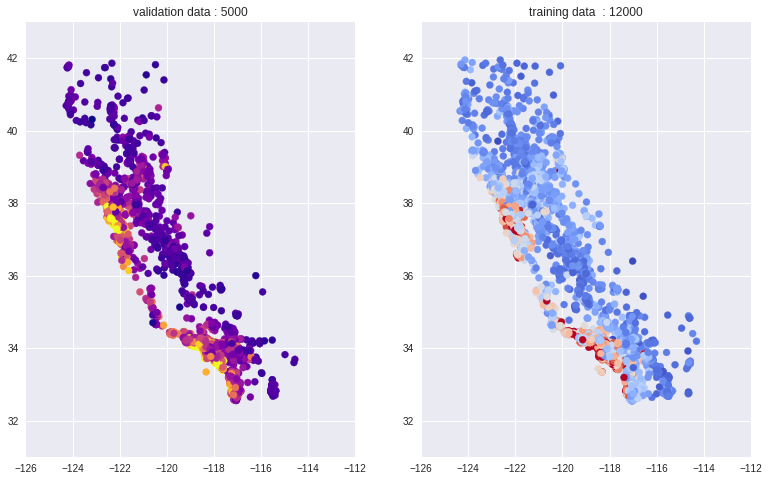

In [0]:
class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 500;
    #Number of iterations to perform to calculate loss
    self.Steps = 2000;
    #Reporting period to show the number of times to report
    self.Periods = 20;
    #Learning Rate
    self.Learning_rate = 0.00001
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

def preprocess_features(df, selectedFeatures = []):
  selected_features = df[selectedFeatures]
  processed_features = selected_features.copy()
  
  processed_features['rooms_per_person'] = (df[selectedFeatures[3]] / df[selectedFeatures[5]]).apply(lambda x: min(x,7))
  return processed_features

def preprocess_targets(df,selectedFeatures=[]):
  output = pd.DataFrame() #df[selectedFeatures]
  output[selectedFeatures] = df[selectedFeatures] / 1000
  return output
  
training_count = int(california_housing_dataframe.count()[0] / (17/12))
validation_count = int(california_housing_dataframe.count()[0] / (17/5))
  
training_examples = preprocess_features(california_housing_dataframe.head(training_count), ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
training_targets = preprocess_targets(california_housing_dataframe.head(training_count),['median_house_value'])

validation_examples = preprocess_features(california_housing_dataframe.tail(validation_count), ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
validation_targets = preprocess_targets(california_housing_dataframe.tail(validation_count),['median_house_value'])

#print(training_examples.describe())
#print(training_targets.describe())

plt.figure(figsize=(13,8))
sub = plt.subplot(121)
sub.set_title('validation data : %0d' % validation_examples.count()[0] )
plt.scatter(validation_examples['longitude'],validation_examples['latitude'],cmap='plasma',c=validation_targets["median_house_value"] / validation_targets["median_house_value"].max())
sub.autoscale(False)
sub.set_ylim((31,43))
sub.set_xlim((-126,-112))

sub = plt.subplot(122)
sub.set_title('training data  : %0d' % training_examples.count()[0])
sub.set_ylim((31,43))
sub.set_xlim((-126,-112))

plt.scatter(training_examples['longitude'],training_examples['latitude'],cmap='coolwarm',c=training_targets['median_house_value']/training_targets['median_house_value'].max())
_ = plt.plot()


Training model...
RMSE (on training data):
  validate rmse period 00 : 164.71
  training rmse period 00 : 164.71
  validate rmse period 01 : 162.73
  training rmse period 01 : 162.73
  validate rmse period 02 : 160.81
  training rmse period 02 : 160.81
  validate rmse period 03 : 158.92
  training rmse period 03 : 158.92
  validate rmse period 04 : 157.06
  training rmse period 04 : 157.06
  validate rmse period 05 : 155.24
  training rmse period 05 : 155.24
  validate rmse period 06 : 153.45
  training rmse period 06 : 153.45
  validate rmse period 07 : 151.71
  training rmse period 07 : 151.71
  validate rmse period 08 : 150.01
  training rmse period 08 : 150.01
  validate rmse period 09 : 148.36
  training rmse period 09 : 148.36
  validate rmse period 10 : 146.75
  training rmse period 10 : 146.75
  validate rmse period 11 : 145.18
  training rmse period 11 : 145.18
  validate rmse period 12 : 143.66
  training rmse period 12 : 143.66
  validate rmse period 13 : 142.18
  training r

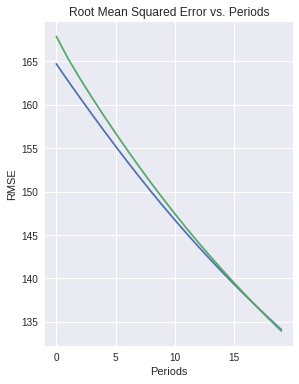

In [0]:
class HyperParameters:
  def __init__(self):
    #Number of examples to use in a batch
    self.BatchSize = 500;
    #Number of iterations to perform to calculate loss
    self.Steps = 2000;
    #Reporting period to show the number of times to report
    self.Periods = 20;
    #Learning Rate
    self.Learning_rate = 0.001
    #Clipping Range
    self.ClipRange = 1.0

hp = HyperParameters()

def my_input_function(features,targets,batch_size=1,shuffle=True,num_epochs=None):
  features = {key:np.array(value) for key,value in dict(features).items()}
  
  ds = Dataset.from_tensor_slices((features,targets))
  ds = ds.batch(batch_size).repeat(num_epochs)
  
  if shuffle:
    ds.shuffle(10000)
    
  features,labels = ds.make_one_shot_iterator().get_next()
  return features,labels

def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

def train_model(hp, training_examples, training_targets, validation_examples, validation_targets):
  periods = hp.Periods
  steps_per_period = hp.Steps / periods
  
  training_input_fn = lambda: my_input_function(training_examples, training_targets, batch_size=hp.BatchSize)
  predict_training_input_fn = lambda:my_input_function(training_examples, training_targets, num_epochs=1, shuffle=False)
  predict_validation_input_fn = lambda:my_input_function(validation_examples, validation_targets, num_epochs=1, shuffle=False)
  
  feature_columns = construct_feature_columns(training_examples)
  
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=hp.Learning_rate)
  optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, hp.ClipRange)
  
  linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
      optimizer=optimizer
  )
  
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute loss.
    train_rmse = math.sqrt(
      metrics.mean_squared_error(training_predictions, training_targets))
    valid_rmse = math.sqrt(
      metrics.mean_squared_error(validation_predictions,validation_targets))
    
    
    print("  validate rmse period %02d : %0.2f" % (period, train_rmse))
    print("  training rmse period %02d : %0.2f" % (period, train_rmse))
    training_rmse.append(train_rmse)
    validation_rmse.append(valid_rmse)
    
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse,label="training")
  plt.plot(validation_rmse,label="validation")
  
  return linear_regressor

linear_regressor = train_model(
    hp,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)


In [0]:
california_housing_test_data = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
print(type(linear_regressor))

test_examples = preprocess_features(california_housing_test_data, ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'])
test_targets = preprocess_targets(california_housing_test_data, ['median_house_value'])

predict_test_input_fn = lambda: my_input_function(test_examples,test_targets,num_epochs=1,shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt(
  metrics.mean_squared_error(test_predictions,test_targets)
)
print('RMSE on Test Data: %0.0f' % root_mean_squared_error)

<class 'tensorflow.python.estimator.canned.linear.LinearRegressor'>
RMSE: 131


##Representation


### Making good data
here are a few things to consider when cleaning and representing data

A **Feature Vector** is a representation of data after cleanup from **raw data**

- Records with a natural numerical value can be easily copied to a feature vector

- string values can be converted into feature vectors (e.g. one-hot encoding, which converts a string into a numerical vector of that string compared to all other items in that feature column)

- A good feature should not have non-zero values less than a handful of times. For example, when talking about mobile phones, the model of the phone would be more valuable than the MAC address/Device ID, since there will be handfuls of people with a "samsung galaxy S6" compared to a single value of "CU899342UBN" (an exagerated example). 

- Features should have clear, obvious names and meanings. e.g. record user age in years rather than a unix timestamp.

- Features should NOT have magic values (i.e. -1 value to represent that it is invalid or does not exist). Instead use a second feature column to drive details about a number (for example, instead of Date_Of_Birth=-1, have Date_Of_Birth=Nothing, Date_Of_Birth_Is_Defined=False)

- Features should not have changing fields over time, i.e. Use a harder coded value to represent a feature, such as a town name directly rather than an inferrered identity number/co-ordinate from google maps which you cannot control/version.

- Features should not have crazy outliers. 

- **the Binning trick** is taking a numerical feature value and converting it to a boolean  representation. this can be used to convert non-linear data relationships into discrete vectors. The google example converts latitude to a boolean value, i.e. (Latitude_Between_32_and_33 = True, Latitude_Between_33_and_34 = False). This is basically a shortcut trick for modelling non-linear features 

- You should KNOW your data. 
- - **Visualize** your data with histrograms and scatter plots, rank metrics etc.
- - **Debug your data** to remove duplicate examples, missing values, outliers etc. and making sure your validation and training data accurately represents the look and feel of the data
- - **Monitor** feature quantiles and the number of examples over time. It was good yesterday and it's good today, but it might not be good tomorrow. Add logging or monitoring on data that change or gets refreshed over time.

###Feature Engineering
In traditional programming, the focus is on code. In Machine Learning, the focus is on Representation, and honing a model by adding and improving features.

Raw data can come in many forms, such as JSON, SQL databases, CSV etc.

We need to map this raw data to a feature vector (2 dimensional tensor relating to a single record of data)





####Numerical Values
Numerical values are trivial to map,

converting a 6 or 6.0 from raw data to a scalar value in the tensor vector requires only a 1:1 mapping 

####Categorical Values
Categorical values have a discrete set of possible values, for example a street or town name such as 'Main Street','Second Street','Parallel Street','Adjacent Street'

Since models cannot use a string with learned weights and bias, we use feature engineering to convert strings to numeric values

This can be accomplished using a mapping of raw values called the **Vocabulary** to integers. Since we cannot include every example in this category, we also include a catch-all 'Other' category called an **OOV (out of vocabulary) bucket**.

Using this approach, we map Main Street to 1, Second Street to 2, Parallel Street to 3, Adjacent Street to 4, and All other values to 5.

this would turn a dataset like below

    Rooms - Occupants - City - Cost per Week
    [3,2,'Main Street',320]
    [4,4,'Parallel Street',600]
    [3,1,'Hypotenuse Street',720]

into

    Rooms - Occupants - City - Cost per Week
    [3,2,1,320]
    [4,4,3,600]
    [3,1,5,720]

However, this may not always apply in a linear model (i.e. you cant say that ballarat is 4 times better than melbourne in your weightings.)

This may require a **one-hot encoded** feature instead.

this feature is the length of our Vocabulary in terms of elements, and consists of a number of true/false statements about our data.

to modify the above example we would get a feature that looks like below

    Rooms - Occupants - City [Melbourne, Geelong, Bendigo, Ballarat] - Cost per Week
      [3,2,[1,0,0,0],320]-*
      [4,4,[0,0,1,0],600]
      [3,1,[0,0,0,0],720]

As seen in the final option which is an OOV value, no values are set to 1.

Some houses however might be on the corner of two streets. with the above approach we can set multiple values to 1. 


    [3,3,'Main Street, Parallel Street',720]
     -> 
     [3,1,[1,0,1,0],720]
     
 This is called **Multi-Hot Encoding**
 
 In large datasets however there could be hundreds or millions of potential values to encode. When this happens, we do a technique called **Sparse representation** which takes only values that have a value of one.
 
in the case of the above, it would be a feature vector of the index of each encoded value it represents. 
 
    [3,1,[1,3],720]
    
just to be doubly clear, the above example is an abstraction of a n length vector that shows only the indices of values that meet a True criteria, i.e. only column 1 and 3 are 'True' of the 4 possible values in the vector.


###Scaling
Scaling is the process of converting floating point feature values from a natural range to a standardised range (i.e. converting a value from [150'000...900'000] to [0,1]). 

- Scaling is mostly used to help gradient descent converge more quickly
- Helps avoid a NaN issue where a value exceeds floating-point precision during training, which causes model weights and bias to become NaN over time.
- Helps models learn approproiate weights for each feature without paying too muych attention to wide-ranged feature data. (a model will get caught up trying to weigh for values of 1 to 4 billion, where as 0.00000025 to 1, while the same scale, is a smaller range and fits better with learning rates in the 1.00^-n range)

Another popular tactic is to calculate a **Z Score**, which relates to the number of standard deviations away from the mean. 

    scaledValue = (value - mean) / stddev
    
for example, *mean = 100, stddev = 20, val = 130*

the scaled value would be *(130-100)/20 = 1.5*

This puts the gross majority of values between -3 and +3 with 0.27% of a dataset being outside those values (99.73% of data is covered within 3 standard deviations)

###Extreme Outliers

Extreme outliers can be recognized by VERY long heads and tails on histrograms of data. To fix this, we can get 3.5 standard deviations of the data (which covers 99.95% of data) from the mean to find extreme outliers and cap their values at the 3.5 standard deviation value. This makes the data much more valuable for training, since the data will no longer be skewed by the extreme outlier values.

###Binning
Binning is useful for seperating non-linear values in our feature values into seperate 'Bins' for training.

An example of this could be latitude in the California dataset

A house in los angeles (latitude 34) will be worth more than a house out in the sticks at latitude 33. you can NOT use latitude as a weight for model learning, since los angeles will not be 34/33 times more expensive.

to do this you can bin the values into distinct boolean features similar to one-hot encoding.

the california dataset goes from 32 to 41 latitude, which means that you could represent the latitude in a feature vector of length (41-32 = 9)

      32,33,34,35,36,37,38,39,40,41
    [ 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
this allows the model to learn new weights based on the binned value.

an alternative method of Binning is to bin by Quantile, where you split data into equally sized bins e.g. splitting latitude into 100 bins (percentile quantile), there may be MANY houses with a latitude between 33 and 34 (the latitude of los angeles) compared to 34 and 35 (a national forest), thus to split it into 100 even bins we could have a bin for 33 -> 33.3, 33.3 -> 33.6, and 33.6 -> 34, but only one bin between 34 and 35 (exaggerated example). This also removes the need to worry about outliers as much. 

4.092123696198854


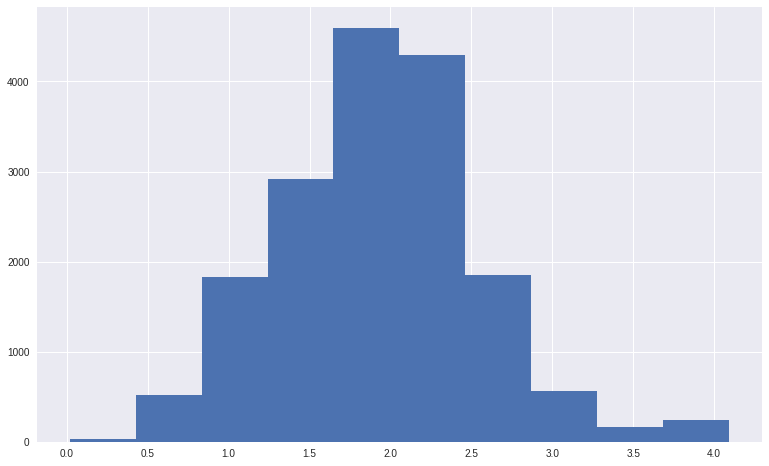

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

plt.figure(figsize=(13,8))

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe['outliers'] = (california_housing_dataframe['total_rooms'] / california_housing_dataframe['population'])

Three_And_Half_Standard_Deviations = california_housing_dataframe['outliers'].std() * 3.5
print(Three_Standard_Deviations)
california_housing_dataframe['outliers'] = california_housing_dataframe['outliers'].apply(lambda x: max((Three_Standard_Deviations*-1),min(x,Three_Standard_Deviations)))
california_housing_dataframe['outliers'].hist(bins=10)


###Scrubbing
Data from real life is not trustworthy, with many failurs such as
- **Omitted Values** i.e. someone forgetting to input a feature value
- **Duplicate Examples** for example, a server uploading the same error log twice
- **Bad Labels** for example an Oak tree being labeled as a Maple tree
- **Bad feature values** such as an extra digit in attached to a value, or a thermometer being in a high heat environment.

once detected, it is typical to 'fix' bad examples by removing them from the data set.

it is also important to scrub the aggregate data set for maximum/minimum values, means and medians, and standard deviation.

##Feature Crosses


A **feature cross** is a **Synthetic Feature** formed by multiplying (crossing) two or more features. Crossing combinations of features can provide predictive abilities beyond what those features can provide individually.

When A and B represent boolean features, such as bins, the resulting cross can be very sparse

####Examples:
Housing Market Price predictor:
     
     [Latitude x num_bedrooms]

Tic-Tac-Toe predictor:
  
    [pos1 x pos2 x ... x pos9]

We use feature crosses in linear models, which scale well on massive data sets to add complexity as well as decouple data


##Regulatization

####L2 Regularization


When we train a model on data, we may eventually overfit (as seen in a previous section) which is where a model is trained on the intricacies of a particular set of data, rather than the concept of the data itself.

previously we attempted to reduce Loss in a system as a measure of determining accuracy, but then when we validate and test the data we encounter a spike in loss, since these datasets have different peculiarities. 

this makes our previous method of risk minimization (error) look abstractly like

    Minimize( Loss(Data|Model) )
    
This basically shows that we try to minimize the loss of our data

**Regularization** is the application of Occam's razor to our systems, by penalizing complexity as a part of **risk minimization**.

When we apply this thought process to validation and testing, we could look at it abstractly like

    Minimize( Loss(Data|Model) + Complexity(Model) )
    
Our training optimization algorithm is now the function of Loss, to see how well a model fits the data, and Regularization, which is a measure of a **models complexity**.

**model complexity** generally falls into two common thought processes,
 - The number of weights of all features in the model
 - The number of features with non-zero weights.
 
Focusing now on the weights, a feature weight with a high magnitude is generally regarded as a more complex than a low magnitude.
 
We can quantify complexity using the **L2 Regularization** formula which defines regularization similarly to L2 Loss, as a sum of the square of all feature weights
 
    Regularization = Sum(Abs(W1^2) + Abs(W2^2) + ... + Abs(Wn^2))
    
In this formula, low weights are promoted while high weights are penalized i.e.

    Given {w1 = 0.2, w2 = 0.5, w3 = 5, w4 = 1, w5 = 0.25, w6 = 0.75}
    
    L2 = Sum(Abs(w1^2) + Abs(w2^2) + Abs(w3^2) + Abs(w4^2) + Abs(w5^2) + Abs(w6^2)) 
    L2 = 0.2^2 + 0.5^2 + 5^2 + 1^2 + 0.25^2 + 0.75^2
    L2 = 0.004 + 0.025 + 25 + 1 + 0.0625 + 0.5625
    L2 = 26.915
    
But as we see in the above example, W3 has a weight of 5, which is 5 times higher than the next highest value, and contributes 25 given a loss of 26 (which is nearly all of the complexity in this L2 regularization formula)

####Applying Lambda

We can tune the impact of the regularization by multiplying it's value by a scalar known as **Lambda** (also called the **Regularization Rate**).

That is, Model Developers aim for the following

    Minimize( Loss(Data|Model) +  λ(Complexity(Model)) )
    
The use of L2 Regularization encourages models to become more distributed (gaussian/bell shaped) and encourages lower weights.

**Lambda** is a hyperparameter that should be tested and tried, since you want to strike a balance between underfitting and overfitting, allowing you to make good predictions in testing. Ideal lambda values allow models to generalize well to new unseen data, but this lambda value is a tuned field done by a person.



##Logistic Regression
An alternative to Linear regression

Logistic regression is where we use logarithms instead of linear models for statistical prediction.

We apply our probability on a sigmoid, a 

         ___
        /
    ___/
    
Shaped function (with asymptotes)

due to the Asymptotes, we must apply regularization more vigorously, since we can never truly approach zero loss (only very close).

L2 Regularization will be extremely useful for keeping the system general
Early stopping will be useful to cut training short.



**Linear logistic regression** is an extremely efficient.

It has very fast training and prediction times (at the expense of RAM).

If we need non-linearities in this model, we can achieve it with feature crosses.

###Probabilities

Many problems may require a probabilistic estimate as an output (a value between 0 and 1).

Logisticic regression is very good for calculating such probabilities.

Probability can be used either "As Is", or in a binary category.

 
Using the google example of predicting that a dog will bark at night the model will predict a value of 0.05. Given 365 days in a year, 0.05% of that is 18 times.

This is an example of As Is prediction. 

To calculate **logistic regression inference** from the learned bias and weights, consider a model with 3 features

- b = 1
- w1 = 2
- w2 = -1
- w3 = 5

and suppose we have an example with the feature values
- x1 = 0
- x2 = 10
- x3 = 2

therefore using the formula

    b+w1x1+w2x2+w3x3
    (1) + (2)(0) + (-1)(10) + (5)(2) = 1
    

we can use the logistic regresssion prediction calculated with the sigmoid function as shown below.
         ___
        /
    ___/
    
which is defined by

    y' = ______1______ 
        (1 + e ^ -(z))
        
where z is a prediction based on a linear models learned weights and bias. Since we just calculated the prediction based on learned weights and bias, and retrieved a value of 1 we can substitute in

    y' = ______1______ 
        (1 + e ^ -(1))
        
    y' = 1/1.3678... = 0.7311
    
    y' = 73.11%
    
This example has a logistical regression percentage value of 73.11%



###Loss function

The loss function for linear loss is Squared Loss. The loss function for **Logistic Regression** is **Log Loss** which can be defined as follows

    LogLoss =     ∑ -y(Log(y'))-(1-y)Log(1-y')
             (x,y)∈D
             
which can be read in english as 
- ∑(x,y)∈D is the data set D containing many labeled examples of (x,y) pairs
- y is the label of the example (a value between 0 and 1 in logistic regression)
- y' is the predicted value given the set of features in x



###Regularization in Logistic Regression

Regularization is extremely important in logistic regression modelling, due tot he asymptotic nature of logistic regression. (Sigmoids never hit 0 or 1)

Hence it is important to dampen model complexity using either **Early stopping** (ending computation early to stop overfit) and **L2 Regularization** (using the squared sum of weights to pull weights closer to 0 but not quite 0, in an attempt to reduce complexity). 

If a model is left to run it will reach +- infinity in terms of complexity. This can also happen when you have rare crosses, such as identity columns or non-zero

##Classification

###Thresholding
Thresholding is the application of uncertainty/certainty to a model to decide whether something is true/false, good/bad, cute/not cute.

In logistic regression, you are always returned a probability. This could be used "as is" (30% chance of this being a cat) or it could be converted into a binary value (is a cat, is not a cat) 

Using a probability with a binary value is easy to say yes or no too, when an email scores 0.03% or 99.95% of being spam, but what happens if an email scores 51%? 

To solve this probelm, we define a classification threshold. This is a predefined scalar threshold for probability to determine the likeness of an email to spam.
It is tempting to consider 50% a good threshold, but your data could only contain obvious spam messages, rather than phishing attempts that attempt to look as legitimate as possible, or it could contain phising attempts that cause false positives on real emails. 

Here the difficulties of classification threshold values arise, and decision making/trade-offs may have to be made. i.e. it is vital that non-spam is not marked as spam, so you may have to accept some spam through the filter. 

Eliminating False positive errors (marking non-spam as spam) in lieu of some false negatives (marking spam as non-spam) making it through the filter is a decision you may have to make as a part of your job.



###True vs. False, Positive vs. Negative




in class-imbalanced problems, It becomes easier to seperate the errors into true/false, positive/negative.

|True/False|Positive/Negative|Example
|---|---|---|
|True|Positive|We called wolf, the chickens are saved|
|True|Negative|No Wolf, No alarm. Everything is fine|
|False|Positive|We called wolf falsely, the town is angry at us|
|False|Negative|Wolf wasnt spotted, all our chickens eaten|

The goal of our model is to maximize the true options while minimizing the false options.

We are, however, able to derive useful metrics from all these by using these positives and negatives as a part of determining accuracy, and reciever of operations characteristics.

###Accuracy

**accuracy** is a method of evaluating classification, by dividing the number of samples we got correct vs the number of samples in total.

Accuracy however, has a flaw in cases with **Class Imbalance**, where a model is predicting extremely rare events, such as ad clickthrough rates. On average an ad will only have 1/1000 users clicking on it, even in the best circumstances. 

if we had a model with no weights or biases, and it's only learned behavirous was to always to say 'false', it would have an accuracy of 99.99% (damn good)

Accuracy is defined as

                
    Accuracy = Number of correct predictions / Total Number of predictions 
    
or to put it into perspective of our true/false, positive/negative 

    Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative) 
    
say we have a cancer detection model with 100 feature values.

we have Cancer Positive results (Malignant) and Cancer Negative results (Benign).
<table>  <tr>    <td><b>True Positive</b></td>
    <td><b> False Positive</b></td>  </tr>    <tr>
    <td>Reality: Malignant<br>Prediction: Malignant<br>Count: 1</td>    <td>Reality: Benign<br>Prediction: Malignant<br>Count: 1</td>
  </tr>    <tr>    <td><b>False Negative</b></td>    <td><b>True Negative</b></td>
  </tr>    <tr>    <td>Reality: Malignant<br>Prediction: Benign<br>Count: 8</td>    <td>Reality: Benign<br>Prediction: Benign<br>Count: 90</td>
  </tr>  </table>

Here we see an accuracy of 91/100, or 91%. 

While this looks like a good amount, you could also build a model that predicts exclusively benign tumors and still achieve the same results by looking at the false positive and true negative.

This dataset is considered a **Class-Imbalanced data set** since there is a significant disparity betweenthe number of positive and negative labels. To improve this data set, it would be better to have an equal number of labels to determine accuracy equally.

###Precision and Recall

This gives us a different evaluation metric for classification, **Precision**. 
Precision is the number of true positives divided by the number of all positive predictions. This shows the rate at which we get True vs False positive predictions.

i.e. When the model said "positive" was it right? did the model cry "wolf" too often and need to be less aggressive?

Precision is defined as 

    Precision = TruePositives / (True Positives + False Positives)
    
A model with no false positives will always show a precision of 1. 

Using the below matrix that we used for our cancer predictions
<table><tr><td><b>True Positive</b></td><td><b> False Positive</b></td>  </tr>      <tr><td>1</td><td>1</td>  </tr><tr><td><b>False Negative</b></td>    <td><b>True Negative</b></td>  </tr><tr>    <td>8</td> <td>90</td>  </tr>  </table>

we can calulate the precision as follows

    Precision = 1 / (1 + 1) = 0.5
    
This means that when it predicts a malignant tumor, it is correct 50% of the time.

This also lends itself into another evaluation metric, called **Recall**
Recall is the number of true positives divided by the number of actual positives. As opposed to precision which is entirely in the realm of predictions, recall is the the number of true positives predicted vs the number of true positives known.

i.e. Did the model miss any "wolves" when predicting? do we need to be more aggressive in crying "wolf"

Recall is defined as

    Recall = TruePositives / (TruePositives + FalseNegatives)
    
so using the tumor chart above,

    Recall =- 1 / 1 + 8 = 0.11
    
this means it has a recall of 11, or it correctly identifies 11% of all malignant tumors.


These two metrics are often in **Tension**, where they are competing to be lower but are both important to keep close to 1.

This means that by getting better results in one, you may reduce the results in the other. 

Given a spam filter with the following facts

<table><tr><td><b>True Positive</b></td><td><b> False Positive</b></td>  </tr>      <tr><td>8</td><td>2</td>  </tr><tr><td><b>False Negative</b></td>    <td><b>True Negative</b></td>  </tr><tr>    <td>3</td> <td>17</td>  </tr>  </table>

we can calculate the following: 

    precision = TP/TP+FP = 8/8+2 = 0.8
    Recall = TP/TP+FN = 8/8+3 = 0.73
    
Now lets increase the **classification threshold** by some arbitrary percentile amount

<table><tr><td><b>True Positive</b></td><td><b> False Positive</b></td>  </tr>      <tr><td>7</td><td>1</td>  </tr><tr><td><b>False Negative</b></td>    <td><b>True Negative</b></td>  </tr><tr>    <td>4</td> <td>18</td>  </tr>  </table>
    
we can calculate the following: 

    precision = TP/TP+FP = 7/7+1 = 0.88
    Recall = TP/TP+FN = 7/7+4 = 0.64
    
Here we can see that precision has increased, but recall has decreased. 

Given the number of examples that had a false negative compared to a false positive, recall may be a more important factor to consider when tweaking the model now. So lets Decrease the classification threshold to below our original amount.

<table><tr><td><b>True Positive</b></td><td><b> False Positive</b></td>  </tr>      <tr><td>9</td><td>3</td>  </tr><tr><td><b>False Negative</b></td>    <td><b>True Negative</b></td>  </tr><tr>    <td>2</td> <td>16</td>  </tr>  </table>

we can calculate the following: 

    precision = TP/TP+FP = 9/9+3 = 0.75
    Recall = TP/TP+FN = 9/9+2 = 0.81
    
Here we have increased our recall at the expense of precision. As every model is different, it may be important to consider what is more valuable in your model. 

when classifying spam, it is more important to let some spam in than not let some real emails in, but in the case of a cancer diagnosis, it may be more important to  err on the side of safety and accept that a false positive that is confirmed safe is better than a false negative confirmed dangerous.

An application of the precision and recall metric is something called the **F1 Score**

which is a measure of accuracy in relation to precision and recall. 

    p = 2 * ((precision * recall) / (precision + recall) ) 
    
so using the 3 above examples
  
    p = 2*((0.8*0.73)/(0.8+0.73)) = 2x(0.54/1.53) = 2(0.353) = 0.705
    
    p = 2*((0.88*0.64)/(0.88+0.64)) = 2x(0.563/1.52) = 2(0.37) = 0.74
    
    p = 2*((0.75*0.81)/(0.75+0.81)) = 2x(0.607/1.56) = 2(0.389) = 0.778
    
we can see that by lowering the classification threshold we end up with better scores.


###ROC and AUC


We might not know in advance what the best thresholds could be, so it may be helpful to know how our model will perform across all thresholds.

We can apply a metric called the  **ROC Curve** (**R**eciever **O**perating **C**haracteristic Curve)

the curve plots two parameters:
- True positive rate
- False positive rate

**True positive rate (TPR)** is a synonym for recall, defined as previously as

    TPR = TP/(TP+FN)
    
**Fasle positive rate (FPR)** is defined as

     FPR = FP/(FP+TN)
     
An ROC curve plots TPR vs FPR at different classification thresholds. Lowering the classification threshold classifies more items positive, thus increasing both false positives and true positives. 

to calculate the points in an ROC curve, we could evalulate a lofistric regression model many times with different thresholds, but this would be inefficient. fortunately theres a sorting-based algorithm that can provide this information, called UAC.

**AUC** (**A**rea **U**nder the ROC **C**urve) measures the 2-dimensional area underneath a ROC curve, and is an aggregate measure of performance across all possible classification thresholds. UAC can be interpreted as the probabiility a random positive example is ranked higher than a random negative example.

i.e.

|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|N|N|N|N|N|N|N|P|N|N|P|N|P|N|P|P|P|P|P|P|

By calculating the AUC you can get a general feel for how accurate the model is on a scale of 0 to 1. When 100% of predictions are wrong, the AUC is 0, when 100% of prediuctions are right we have an AUC of 1.0.

This is a tricky thing to understand, but you dont need a classification threshold for the AUC since you use the rankings of positive and negative examples in a model. i.e. given a random spread of predictions and their TPR/FPR rates, how are the predictions ranked?

by calculating the area under the curve, you can calculate the quality of a model irrespective of a chosen classification threshold.

Very tricky to understand, might be a try and see sort of problem.

###Prediction Bias

Prediction bias is a measure of how a model is biased when making a prediction. Not a bias associated with the model.\

You can find prediction bias by using

    PredictionBias = averageOfPredictions - AverageOfLabels
    
A significant nonzero bias is indicative of a bug in the model, as it indicated the model is wrong about positive label frequency.

For example, given that 1% of emails are spam (in this example), we should have a definitive prediction that given any email, it is 1% likely to be spam. (if we pass in 1000 examples, we would expect 10 of them to be spam). 

However, if our prediction average is 20%, there is likely a prediction bias.

things that can cause prediction bias could be some of the following:
- incomplete feature set
- noisy data
- buggy pipeline
- biased training samples
- overly strong regularization

seeing a bias such as this this may tempt the model creator to add a calibration layer to adjust prediction bias post post-prediction. This may be fine on small bias' that you can account for, but it should be noted this 
- fixes a symptom rather than the underlying issue
- adds complexity/brittleness to the model that must be kept relevant.

it is better to avoid calibration layers all together, as projects using them tend to gain reliance on them.

##Regularization for Sparcity


Ideally we would like to penalize L0 norm of weights, where we penalize having a weight at all, but this is NP hard so it becomes difficult top optimize.

instead we relax to L1 regularization, which penalizes the sum of absolute weights. This encourages sparsity unlike L2.

Sparse ectors often contain many dimensions, and creating a feature cross creates even more dimensions. given such high-dimensional feature vectors, model sizes may become huge and require monstrous amounts of RAM.

in a high-dimensional sparse vector, it would be nice to encourage weights to drop to exactly 0 where possible. A weight of exactly 0 removes the corresponding feature from the model, which saves RAM, regularizes the complexity of the model, and reduces noise.

If we had a housing data set that covered not just california but the entire globe, bucketing global latitude into minutes (1/60th of a degree) is 180 x 60 (10'800) dimensions of very sparse encoding. Longitude is twice this, at 21'600 dimensions, so performing a feature cross of these 2 veatures would be 10'800 x 21'600 (233'000'000). it would be silly 

##Neural Nets

###Anatomy

**Nonlinear** means that you cant accurately predict a label with a model of the form b + w1x1 + w2x2 + ... + wNxN
in other words, the decision surface is not a line. 

Previously we looked at feature crosses as one possible approach to modelling nonlinear problems (a synthetic feature formed by multiplying two or more features)

randomly scattered datasets  may be unsolvable with linear problems, as no single line will definitively "solve" a problem.

in fixing this, we may add **Hidden Layers** which are intermediary values to apply weights to our model. 

we then have Input -?> hidden layer -?> output

but this still doesnt change the linearity of the model, all we have done is just apply another level of weights to our model.

We could add many more layers of weighted sums and it would still be a linear model.

What we have to do is use Activation Functions


###Activation Functions

To model a nonlinear problem we have to introduce nonlinearity.

We can pipe a layer in our model through a nonlinear function called an **Activation Function**

Now we have this added layer, adding layers has more impact. Stacking nonlinearities lets us build very complicated relationships between the input and predicted output.
  
Some common activation functions are as follows:
  
**Sigmoid** activation function, defined as F(x) = 1/(1+e^(-x))

**ReLU (Rectified Linear  Unit)** activation function, defined as F(x) = max(0,x)

**tanh** activation function, defined as F(x) = tanh(x)

In summary,

- we add a set of hidden Nodes, analogous to neurons, organized in layers. 
- A set of weights representing the connections between each layer (.i.e. the connection from this node to that node has a weight of 0.2)
- A set of bias', one for each node
- An activation function transforms the output of each node in a layer. You can add functions to multiple layers.

###Introduction to neural networks

Training model...
RMSE (on training data):
  period 00 : 240.04
  period 01 : 182.57
  period 02 : 165.69
  period 03 : 164.34
  period 04 : 164.09
  period 05 : 163.75
  period 06 : 163.60
  period 07 : 163.45
  period 08 : 163.09
  period 09 : 162.85
Model training finished.
Final RMSE (on training data):   162.85
Final RMSE (on validation data): 164.17
Final RMSE (on test data): 157.97


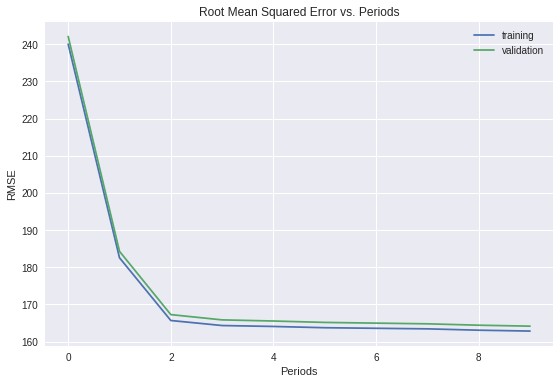

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm, gridspec, pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

DebugMode = False

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://dl.google.com/mlcc/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))

california_housing_test_data = pd.read_csv("https://dl.google.com/mlcc/mledu-datasets/california_housing_test.csv", sep=",")

class HyperParameters:
  def __init__(self,steps=1000,learning_rate=0.1,batch_size=200,periods=10,hidden_units=[10,10],clip_range=5.0,L1=0.001,L2=0.001):
    self.steps = steps
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.periods = periods
    self.hidden_units = hidden_units
    self.clip_range = clip_range
    self.L1 = L1
    self.L2 = L2

def preprocess_features(dataframe,feature_set,MultiplyCrossFeatures=None,DivideCrossFeatures=None):
  selectedFeatures = dataframe[feature_set]
  processedFeatures = selectedFeatures.copy()
  if MultiplyCrossFeatures is not None:
    for key in DivideCrossFeatures.items():
      m = None
      for items in key[1]:
        if m is None:
          m = selectedFeatures[items]
        else:
          m = m * selectedFeatures[items]
      processedFeatures[key[0]] = m
  if DivideCrossFeatures is not None:
    for key in DivideCrossFeatures.items():
      l = None
      for items in key[1]:
        if l is None:
          l = selectedFeatures[items]
        else:
          l = l / selectedFeatures[items]
      processedFeatures[key[0]] = l
  return processedFeatures

def preprocess_targets(dataframe,feature_set, ModFunction = None):
  output_targets = pd.DataFrame()
  output_targets[feature_set] = dataframe[feature_set]
  if ModFunction is not None:
    output_targets[feature_set] = output_targets[feature_set].apply(ModFunction)
  return output_targets

def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
  features = {key:np.array(value) for key,value in dict(features).items()}
  ds = Dataset.from_tensor_slices((features,targets))
  ds = ds.batch(batch_size).repeat(num_epochs)
  if shuffle:
    ds = ds.shuffle(10000)
    
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels

def test_nn_regression_model(
  model,
  test_examples,
  test_targets):
  
  test_input_fn = lambda: my_input_fn(test_examples,test_targets, num_epochs=1, shuffle=False)
  
  testing_predictions = model.predict(input_fn=test_input_fn)
  testing_predictions = np.array([item['predictions'][0] for item in testing_predictions])
  testing_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(testing_predictions,test_targets))
  print("Final RMSE (on test data): %0.2f" % testing_root_mean_squared_error)
  return  testing_root_mean_squared_error
  
def train_nn_regression_model(
  hp,
  training_examples,
  training_targets,
  validation_examples,
  validation_targets):
    
  periods = hp.periods
  steps = hp.steps
  steps_per_period = steps / periods
  
  optimizer = tf.train.FtrlOptimizer(learning_rate=hp.learning_rate,l1_regularization_strength=hp.L1,l2_regularization_strength=hp.L2)
  optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer,hp.clip_range)
  
  dnn_regressor = tf.estimator.DNNRegressor(
    feature_columns=construct_feature_columns(training_examples),
      hidden_units=hp.hidden_units,
      optimizer=optimizer
  )
  
  training_input_fn = lambda: my_input_fn(training_examples,training_targets, batch_size = hp.batch_size)
  predicti_input_fn = lambda: my_input_fn(training_examples,training_targets, num_epochs=1, shuffle=False)
  validiti_input_fn = lambda: my_input_fn(validation_examples,validation_targets, num_epochs=1, shuffle=False)
  
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    dnn_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    training_predictions = dnn_regressor.predict(input_fn=predicti_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions]) 
    
    validation_predictions = dnn_regressor.predict(input_fn=validiti_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions,training_targets))
    validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions,validation_targets))
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
  print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

  return dnn_regressor
 
  
DivideByThousand = lambda x: x / 1000

hp = HyperParameters(learning_rate=0.001,steps=2000,batch_size=100,hidden_units=[10,8])

training_examples = preprocess_features(dataframe=california_housing_dataframe.head(12000),
                    feature_set=["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],
                    DivideCrossFeatures={"rooms_per_person":["total_rooms","population"]})
training_targets = preprocess_targets(dataframe=california_housing_dataframe.head(12000),feature_set=["median_house_value"],ModFunction=DivideByThousand)

validation_examples = preprocess_features(dataframe=california_housing_dataframe.tail(5000),
                    feature_set=["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],
                    DivideCrossFeatures={"rooms_per_person":["total_rooms","population"]}
                   )
validation_targets = preprocess_targets(dataframe=california_housing_dataframe.tail(5000),feature_set=["median_house_value"],ModFunction=DivideByThousand)

test_examples = preprocess_features(dataframe=california_housing_test_data,
                            feature_set=["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],
                            DivideCrossFeatures={"rooms_per_person":["total_rooms","population"]})
test_targets = preprocess_targets(dataframe=california_housing_test_data,feature_set=["median_house_value"],ModFunction=DivideByThousand)

if DebugMode:
  
  print("Training examples summary:")
  display.display(training_examples.describe())
  print("Validation examples summary:")
  display.display(validation_examples.describe())
  print("Training targets summary:")
  display.display(training_targets.describe())
  print("Validation targets summary:")
  display.display(validation_targets.describe())
  print("Testing targets summary:")
  display.display(test_examples.describe())
  print("Testing targets summary:")
  display.display(test_targets.describe())

nn = train_nn_regression_model(hp,training_examples,training_targets,validation_examples,validation_targets)
test = test_nn_regression_model(nn,test_examples,test_targets)



###Best Practices


**Vanishing Gradients** are when gradients closer to the input become very small. When gradients vanish towards zero at the lower layers, these layers train very slowly or not at all since they take the product(multiplication) of many small terms (i.e. 0.05 * 0.01 = 0.0005) Using a ReLU activation function can help prevent vanishing gradients.

**Exploding Gradients** are when the weights in a network are very large, and involve products of many large terms (i.e. 4 x 4 x 4 x 4 = 256 ). Gradients in this case will get too large to converge. Batch normalization and lower learning rates can prevent exploding gradients.

**Dead ReLU units**. If the weighted sum for a ReLU unit falls below 0, the ReLU unit can get stuck. it outputs 0 at activation, contribuing nothing to a network output, and gradients can no longer flow through it during backpropogation. With a source of gradients cut off, the input to ReLU may not ever change enough to bring the weighted sum back above 0.

Lower learning rates can help ReLU from dying.

**Dropout** is the process of randomly disabling nodes in our network, to strengthen regularization. 

we randomly remove nodes on each training step to ensure that a system has little dependency on a single node.

dropout is a scale from 0 to 1, where 0 is no dropout and 1 is 100% dropout. values between 0 and 1 can be much more useful.



###Improving Neural Network performance

Training model...
RMSE (on training data):
  period 00 : 98.32
  period 01 : 97.98
  period 02 : 97.73
  period 03 : 97.09
  period 04 : 96.31
  period 05 : 95.02
  period 06 : 93.99
  period 07 : 93.03
  period 08 : 93.81
  period 09 : 92.68
Model training finished.
Final RMSE (on training data):   92.68
Final RMSE (on validation data): 94.61
Final RMSE (on test data): 93.46


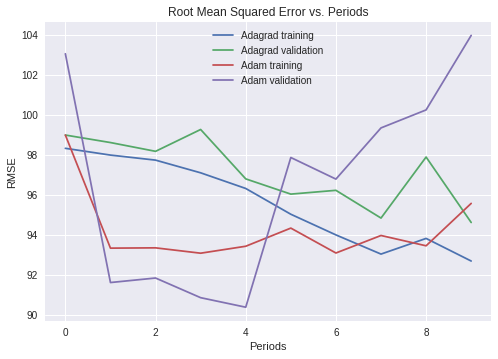

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm, gridspec, pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
import threading

DebugMode = False

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://dl.google.com/mlcc/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))

california_housing_test_data = pd.read_csv("https://dl.google.com/mlcc/mledu-datasets/california_housing_test.csv", sep=",")

class HyperParameters:
  def __init__(self,steps=1000,learning_rate=0.1,batch_size=200,periods=10,hidden_units=[10,10],clip_range=5.0,L1=0.001,L2=0.001):
    self.steps = steps
    self.learning_rate = learning_rate
    self.batch_size = batch_size
    self.periods = periods
    self.hidden_units = hidden_units
    self.clip_range = clip_range
    self.L1 = L1
    self.L2 = L2
    
    
hp = HyperParameters(learning_rate=0.001,steps=5000,batch_size=100,hidden_units=[10,10])

# +=======================================+
# JIT Functions - Modify these to change functionality
# +=======================================+

#Function applied to all targets
pre_process_targets_lambda  = lambda x: x / 1000
# Function called after processing a feature dataframe.
processed_features_lambda = lambda x: (x)

def normalize_scale(dataframe):
  return normalize_log_scale(dataframe)

def normalize_dataframe(dataframe):
  return normalize_full_dataframe(dataframe)


# +=======================================+
# Normalization operations
# +=======================================+

def clip(series, clip_to_min, clip_to_max):
  return series.apply(lambda x:(min(max(x, clip_to_min), clip_to_max)))


def standard_deviation_clipping(series, deviations=3):  
  mean = series.mean()
  sd = (series.std() * deviations)
  tem = series.apply(lambda x: x if x < mean + sd else (mean + sd))
  tem = series.apply(lambda x: x if x > mean - sd else (mean - sd))
  return tem  

def z_score_normalize(series):  
  mean = series.mean()
  sd = (series.std())
  tem = series.apply(lambda x: (x-mean)/sd)
  return tem  

def linear_scale(series):
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2
  return series.apply(lambda x: ((x - min_val) / scale) - 1.0)

def log_scale(series):
  return series.apply(lambda x: math.log(abs(x+1)))

def normalize_log_scale(dataframe):
    return dataframe.apply(lambda s:log_scale(s))

def normalize_linear_scale(dataframe):
  return dataframe.apply(lambda s:linear_scale(s))

def lat_lon_normalize_dataframe(dataframe):
  processed_features = pd.DataFrame()
  processed_features["latitude"] = linear_scale(dataframe["latitude"])
  processed_features["longitude"] = linear_scale(dataframe["longitude"])
  return processed_features
  
def normalize_full_dataframe(dataframe):
  processed_features = pd.DataFrame()
  
  processed_features["households"] = log_scale(dataframe["households"])
  processed_features["median_income"] = log_scale(dataframe["median_income"])
  processed_features["total_bedrooms"] = log_scale(dataframe["total_bedrooms"])
  
  processed_features["latitude"] = linear_scale(dataframe["latitude"])
  processed_features["longitude"] = linear_scale(dataframe["longitude"])
  processed_features["housing_median_age"] = linear_scale(dataframe["housing_median_age"])

  processed_features["population"] = linear_scale(clip(dataframe["population"], 0, 5000))
  processed_features["rooms_per_person"] = linear_scale(clip(dataframe["rooms_per_person"], 0, 5))
  processed_features["total_rooms"] = linear_scale(clip(dataframe["total_rooms"], 0, 10000))

  return processed_features

# +=======================================+
# TensorFlow operations
# +=======================================+

def preprocess_features(dataframe,feature_set,MultiplyCrossFeatures=None,DivideCrossFeatures=None):
  selectedFeatures = dataframe[feature_set]
  processedFeatures = selectedFeatures.copy()
  if MultiplyCrossFeatures is not None:
    for key in DivideCrossFeatures.items():
      m = None
      for items in key[1]:
        if m is None:
          m = selectedFeatures[items]
        else:
          m = m * selectedFeatures[items]
      processedFeatures[key[0]] = m
  if DivideCrossFeatures is not None:
    for key in DivideCrossFeatures.items():
      l = None
      for items in key[1]:
        if l is None:
          l = selectedFeatures[items]
        else:
          l = l / selectedFeatures[items]
      processedFeatures[key[0]] = l
  processedFeatures = processedFeatures.apply(processed_features_lambda)
  return processedFeatures

def preprocess_targets(dataframe,feature_set, ModFunction = None):
  output_targets = pd.DataFrame()
  output_targets[feature_set] = dataframe[feature_set]
  if ModFunction is not None:
    output_targets[feature_set] = output_targets[feature_set].apply(ModFunction)
  return output_targets


def construct_feature_columns(input_features):
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_features])

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
  features = {key:np.array(value) for key,value in dict(features).items()}
  ds = Dataset.from_tensor_slices((features,targets))
  ds = ds.batch(batch_size).repeat(num_epochs)
  if shuffle:
    ds = ds.shuffle(10000)
    
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels

def get_Optimizers():
  return ["AdagradOptimizer","AdamOptimizer","FtrlOptimizer","GradientDescentOptimizer"]

def get_Optimizer(hp,optimizerType):
  if optimizerType == "AdagradOptimizer":
    optimizer = tf.train.AdagradOptimizer(learning_rate=hp.learning_rate)
    #optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer,hp.clip_range)
    return optimizer
  if optimizerType == "AdamOptimizer":
    optimizer = tf.train.AdamOptimizer(learning_rate=hp.learning_rate)
    optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer,hp.clip_range)
    return optimizer
  if optimizerType == "FtrlOptimizer":
    optimizer = tf.train.FtrlOptimizer(learning_rate=hp.learning_rate,l1_regularization_strength=hp.L1,l2_regularization_strength=hp.L2)
    optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer,hp.clip_range)
    return optimizer
  if optimizerType == "GradientDescentOptimizer":
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=hp.learning_rate)
    optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer,hp.clip_range)
    return optimizer
    
def test_nn_regression_model(
  model,
  test_examples,
  test_targets):
  
  test_input_fn = lambda: my_input_fn(test_examples,test_targets, num_epochs=1, shuffle=False)
  
  testing_predictions = model.predict(input_fn=test_input_fn)
  testing_predictions = np.array([item['predictions'][0] for item in testing_predictions])
  testing_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(testing_predictions,test_targets))
  print("Final RMSE (on test data): %0.2f" % testing_root_mean_squared_error)
  return  testing_root_mean_squared_error
  
def train_nn_regression_model(
  hp,
  optimizer,
  training_examples,
  training_targets,
  validation_examples,
  validation_targets):
    
  periods = hp.periods
  steps = hp.steps
  steps_per_period = steps / periods
  

  dnn_regressor = tf.estimator.DNNRegressor(
    feature_columns=construct_feature_columns(training_examples),
      hidden_units=hp.hidden_units,
      optimizer=optimizer
  )
  
  training_input_fn = lambda: my_input_fn(training_examples,training_targets, batch_size = hp.batch_size)
  predicti_input_fn = lambda: my_input_fn(training_examples,training_targets, num_epochs=1, shuffle=False)
  validiti_input_fn = lambda: my_input_fn(validation_examples,validation_targets, num_epochs=1, shuffle=False)
  
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    dnn_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    training_predictions = dnn_regressor.predict(input_fn=predicti_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions]) 
    
    validation_predictions = dnn_regressor.predict(input_fn=validiti_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_predictions,training_targets))
    validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_predictions,validation_targets))
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")
  if DebugMode:
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

  print("Final RMSE (on training data):   %0.2f" % training_root_mean_squared_error)
  print("Final RMSE (on validation data): %0.2f" % validation_root_mean_squared_error)

  return dnn_regressor,training_rmse,validation_rmse
 

training_examples = normalize_dataframe(preprocess_features(dataframe=california_housing_dataframe.head(12000),
                    feature_set=["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],
                    DivideCrossFeatures={"rooms_per_person":["total_rooms","population"]}))
training_targets = preprocess_targets(dataframe=california_housing_dataframe.head(12000),feature_set=["median_house_value"],ModFunction=pre_process_targets_lambda)

latlon_training_examples = lat_lon_normalize_dataframe(preprocess_features(dataframe=california_housing_dataframe.head(12000),
                    feature_set=["latitude","longitude"]))

validation_examples = normalize_dataframe(preprocess_features(dataframe=california_housing_dataframe.tail(5000),
                    feature_set=["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],
                    DivideCrossFeatures={"rooms_per_person":["total_rooms","population"]}
                   ))
validation_targets = preprocess_targets(dataframe=california_housing_dataframe.tail(5000),feature_set=["median_house_value"],ModFunction=pre_process_targets_lambda)

latlon_validation_examples = lat_lon_normalize_dataframe(preprocess_features(dataframe=california_housing_dataframe.tail(5000),
                    feature_set=["latitude","longitude"]))

test_examples = normalize_dataframe(preprocess_features(dataframe=california_housing_test_data,
                            feature_set=["latitude","longitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"],
                            DivideCrossFeatures={"rooms_per_person":["total_rooms","population"]}))
test_targets = preprocess_targets(dataframe=california_housing_test_data,feature_set=["median_house_value"],ModFunction=pre_process_targets_lambda)

latlon_test_examples = lat_lon_normalize_dataframe(preprocess_features(dataframe=california_housing_test_data,
                            feature_set=["latitude","longitude"]))

if DebugMode:
  
  print("Training examples summary:")
  display.display(training_examples.describe())
  print("Validation examples summary:")
  display.display(validation_examples.describe())
  print("Training targets summary:")
  display.display(training_targets.describe())
  print("Validation targets summary:")
  display.display(validation_targets.describe())
  print("Testing targets summary:")
  display.display(test_examples.describe())
  print("Testing targets summary:")
  display.display(test_targets.describe())

hp.hidden_units = [10,10,5,5,5]
hp.learning_rate = 0.5
adagradoptimizer = get_Optimizer(hp,get_Optimizers()[0])
hp.learning_rate = 0.05
adamoptimizer = get_Optimizer(hp,get_Optimizers()[1])
  
#training_examples.hist(bins=20, figsize=(18, 12), xlabelsize=10)

DoLatLonOnly = True

if DoLatLonOnly:
  nn,adagradt,adagradv = train_nn_regression_model(hp,adagradoptimizer,latlon_training_examples,training_targets,latlon_validation_examples,validation_targets)

  test = test_nn_regression_model(nn,test_examples,test_targets)

  #nn,adamt,adamv = train_nn_regression_model(hp,adamoptimizer,latlon_training_examples,training_targets,latlon_validation_examples,validation_targets)

  #test = test_nn_regression_model(nn,latlon_test_examples,test_targets)
else:
  nn,adagradt,adagradv = train_nn_regression_model(hp,adagradoptimizer,training_examples,training_targets,validation_examples,validation_targets)

  test = test_nn_regression_model(nn,test_examples,test_targets)

  nn,adamt,adamv = train_nn_regression_model(hp,adamoptimizer,training_examples,training_targets,validation_examples,validation_targets)

  test = test_nn_regression_model(nn,test_examples,test_targets)

plt.ylabel("RMSE")
plt.xlabel("Periods")
plt.title("Root Mean Squared Error vs. Periods")
plt.plot(adagradt, label='Adagrad training')
plt.plot(adagradv, label='Adagrad validation')
plt.plot(adamt, label='Adam training')
plt.plot(adamv, label='Adam validation')
_ = plt.legend()



##Multi-Class Neural Networks

###One vs. All

**One Vs. All** is a way of leveraging binary classification. Given a classification problem with N possible solutions, a one vs. all solution consists of N seperate binary classiiers, one binary classifier for each possible outcome. 

During training, the model runs through a sequence of binary classifiers, training each to answer a seperate classification question. For example, given a picture of a dog, fiv different recognizers might be trained, four seeing this as Not a dog (negative example) and one seeing this as a dog (positive example).

- Is this image an apple? No
- Is this image a gold bar? No
- Is this image candy? No
- Is this image a dog? Yes
- Is this image an egg? No

this is a reasonable approach when the number of classes is small, but becomes linearly inefficient to infer from new data, and to train as the number of classes rise. 

###Softmax

Logistical regression produces a decimal between 0 and 1, where an item will have a percentage change of being a positive/negative prediction.

the sum of all probabilities therefore, must equal 1.0 

**Softmax** extends this idea into a multi-class world. That is, softmax assigns decimal probabilities to each class in a multi-class problem.
those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it outherwise would.

using the example above for the 5 classifiers, we could get probabilities like so

- Is this image an apple? 0.001
- Is this image a gold bar? 0.04
- Is this image candy? 0.008
- Is this image a dog? 0.95
- Is this image an egg? 0.001

Softmax is implemented through a neural network layer just before the output layer. the softmax layer must have the same number of nodes as the output layer.

softmax comes in a few variants, here are the 2 important ones.

- **Full Softmax** is the softmax we have previously discussed. 
- **Candidate Sampling** means that softmax calculates a probability for all the positive labels, but only for a sample of negative labels. for example, if training a dog classifier, you show it as many images of beagles and bloodhounds as you can, but only a few select random eggs, candies, apples or gold bars.

####One label vs. Many labels
Softmax assumes that each example is a member of exactly one class. Some examples, however, can simultaneously be a member of multiple classes.

in these cases, you can NOT use softmax, you must instead rely on multiple logistic regressions. 

for example, suppose an image contains a single piece of fruit. softmax can determine if that is a banana, an apple, an orange etc.

but if your image is of a fruitbowl, then you must use multiple logistic regressions.

###MNIST 

MNIST is a dataset of labeled handwritten digits. Lets try to 
- Create a linear model and neural network to classify the handwritten digits
- Compare the performance of the linear and neural network classification models
- Visualize the weights of a neural network hidden layer

Training model...
LogLoss error (on validation data):
  period 00 : 8.15
  period 01 : 5.47
  period 02 : 4.43
  period 03 : 3.91
  period 04 : 3.81
  period 05 : 4.09
  period 06 : 3.72
  period 07 : 3.52
  period 08 : 3.83
  period 09 : 3.58
Model training finished.
Final accuracy (on validation data): 0.90


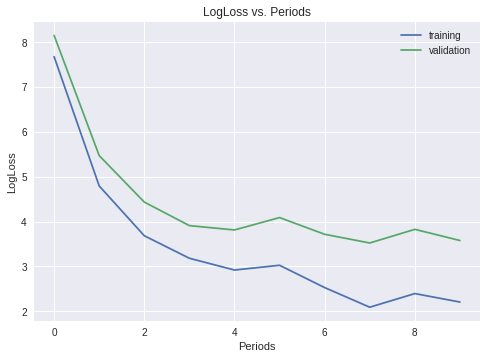

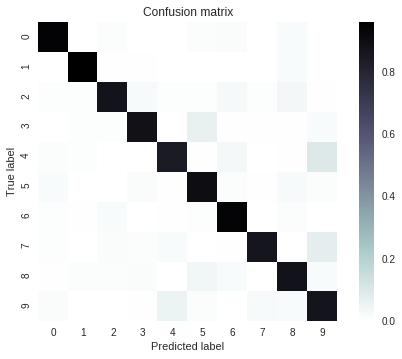

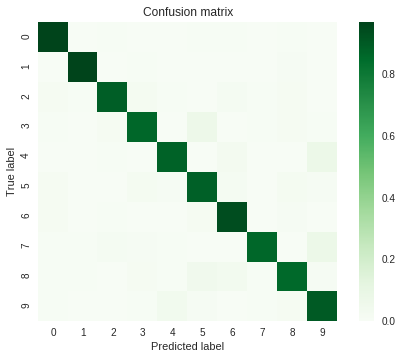

In [0]:
from __future__ import print_function

import glob
import math
import os

from IPython import display
from matplotlib import cm,gridspec,pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

mnist_dataframe = pd.read_csv(
  "https://dl.google.com/mlcc/mledu-datasets/mnist_train_small.csv",
  sep=",",
  header=None)

mnist_dataframe = mnist_dataframe.head(10000)
mnist_dataframe = mnist_dataframe.reindex(np.random.permutation(mnist_dataframe.index))
mnist_dataframe.describe()

def parse_labels_and_features(dataset):
  """Extracts labels and features.
  
  This is a good place to scale or transform the features if needed.
  
  Args:
    dataset: A Pandas `Dataframe`, containing the label on the first column and
      monochrome pixel values on the remaining columns, in row major order.
  Returns:
    A `tuple` `(labels, features)`:
      labels: A Pandas `Series`.
      features: A Pandas `DataFrame`.
  """
  labels = dataset[0]

  # DataFrame.loc index ranges are inclusive at both ends.
  features = dataset.loc[:,1:784]
  # Scale the data to [0, 1] by dividing out the max value, 255.
  features = features / 255

  return labels, features
  
training_targets, training_examples = parse_labels_and_features(mnist_dataframe[:7500])
validation_targets, validation_examples = parse_labels_and_features(mnist_dataframe[7500:10000])

def construct_feature_columns():
  """Construct the TensorFlow Feature Columns.

  Returns:
    A set of feature columns
  """ 
  
  # There are 784 pixels in each image.
  return set([tf.feature_column.numeric_column('pixels', shape=784)])

def create_training_input_fn(features, labels, batch_size, num_epochs=None, shuffle=True):
  """A custom input_fn for sending MNIST data to the estimator for training.

  Args:
    features: The training features.
    labels: The training labels.
    batch_size: Batch size to use during training.

  Returns:
    A function that returns batches of training features and labels during
    training.
  """
  def _input_fn(num_epochs=None, shuffle=True):
    # Input pipelines are reset with each call to .train(). To ensure model
    # gets a good sampling of data, even when number of steps is small, we 
    # shuffle all the data before creating the Dataset object
    idx = np.random.permutation(features.index)
    raw_features = {"pixels":features.reindex(idx)}
    raw_targets = np.array(labels[idx])
   
    ds = Dataset.from_tensor_slices((raw_features,raw_targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
    return feature_batch, label_batch

  return _input_fn

def create_predict_input_fn(features, labels, batch_size):
  """A custom input_fn for sending mnist data to the estimator for predictions.

  Args:
    features: The features to base predictions on.
    labels: The labels of the prediction examples.

  Returns:
    A function that returns features and labels for predictions.
  """
  def _input_fn():
    raw_features = {"pixels": features.values}
    raw_targets = np.array(labels)
    
    ds = Dataset.from_tensor_slices((raw_features, raw_targets)) # warning: 2GB limit
    ds = ds.batch(batch_size)
    
        
    # Return the next batch of data.
    feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
    return feature_batch, label_batch

  return _input_fn

def train_linear_classification_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model for the MNIST digits dataset.
  
  In addition to training, this function also prints training progress information,
  a plot of the training and validation loss over time, and a confusion
  matrix.
  
  Args:
    learning_rate: An `int`, the learning rate to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing the training features.
    training_targets: A `DataFrame` containing the training labels.
    validation_examples: A `DataFrame` containing the validation features.
    validation_targets: A `DataFrame` containing the validation labels.
      
  Returns:
    The trained `LinearClassifier` object.
  """

  periods = 10

  steps_per_period = steps / periods  
  # Create the input functions.
  predict_training_input_fn = create_predict_input_fn(
    training_examples, training_targets, batch_size)
  predict_validation_input_fn = create_predict_input_fn(
    validation_examples, validation_targets, batch_size)
  training_input_fn = create_training_input_fn(
    training_examples, training_targets, batch_size)
  
  # Create a LinearClassifier object.
  my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(),
      n_classes=10,
      optimizer=my_optimizer,
      config=tf.estimator.RunConfig(keep_checkpoint_max=1)
  )

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss error (on validation data):")
  training_errors = []
  validation_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
  
    # Take a break and compute probabilities.
    training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
    training_probabilities = np.array([item['probabilities'] for item in training_predictions])
    training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
    training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)
        
    validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    
    
    # Compute training and validation errors.
    training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
    validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, validation_log_loss))
    # Add the loss metrics from this period to our list.
    training_errors.append(training_log_loss)
    validation_errors.append(validation_log_loss)
  print("Model training finished.")
  # Remove event files to save disk space.
  _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))
  
  # Calculate final predictions (not probabilities, as above).
  final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  final_predictions = np.array([item['class_ids'][0] for item in final_predictions])
  
  
  accuracy = metrics.accuracy_score(validation_targets, final_predictions)
  print("Final accuracy (on validation data): %0.2f" % accuracy)

  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.plot(training_errors, label="training")
  plt.plot(validation_errors, label="validation")
  plt.legend()
  plt.show()
  
  # Output a plot of the confusion matrix.
  cm = metrics.confusion_matrix(validation_targets, final_predictions)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

  return classifier

def train_dnn_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear classification model for the MNIST digits dataset.
  
  In addition to training, this function also prints training progress information,
  a plot of the training and validation loss over time, and a confusion
  matrix.
  
  Args:
    learning_rate: An `int`, the learning rate to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing the training features.
    training_targets: A `DataFrame` containing the training labels.
    validation_examples: A `DataFrame` containing the validation features.
    validation_targets: A `DataFrame` containing the validation labels.
      
  Returns:
    The trained `LinearClassifier` object.
  """

  periods = 10

  steps_per_period = steps / periods  
  # Create the input functions.
  predict_training_input_fn = create_predict_input_fn(
    training_examples, training_targets, batch_size)
  predict_validation_input_fn = create_predict_input_fn(
    validation_examples, validation_targets, batch_size)
  training_input_fn = create_training_input_fn(
    training_examples, training_targets, batch_size)
  
  # Create a LinearClassifier object.
  my_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  '''classifier = tf.estimator.DNNClassifier(
      hidden_units=hidden_units,
      feature_columns=construct_feature_columns(),
      n_classes=10,
      optimizer=my_optimizer,
      config=tf.estimator.RunConfig(keep_checkpoint_max=1)
  )'''
  
  classifier = tf.estimator.DNNClassifier(
    hidden_units=hidden_units,
    feature_columns=construct_feature_columns(),
    n_classes=10,
    optimizer=my_optimizer
  )


  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss error (on validation data):")
  training_errors = []
  validation_errors = []
    
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    classifier.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    
    # Take a break and compute probabilities.
    training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
    training_probabilities = np.array([item['probabilities'] for item in training_predictions])
    training_pred_class_id = np.array([item['class_ids'][0] for item in training_predictions])
    training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,10)
        
    validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
    validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
    validation_pred_class_id = np.array([item['class_ids'][0] for item in validation_predictions])
    validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,10)    
    
    # Compute training and validation errors.
    training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
    validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, validation_log_loss))
    # Add the loss metrics from this period to our list.
    training_errors.append(training_log_loss)
    validation_errors.append(validation_log_loss)
    
  print("Model training finished.")  
  # Remove event files to save disk space.
  _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))
  
  # Calculate final predictions (not probabilities, as above).
  final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  final_predictions = np.array([item['class_ids'][0] for item in final_predictions])
  
  
  accuracy = metrics.accuracy_score(validation_targets, final_predictions)
  print("Final accuracy (on validation data): %0.2f" % accuracy)

  # Output a graph of loss metrics over periods.
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.plot(training_errors, label="training")
  plt.plot(validation_errors, label="validation")
  plt.legend()
  plt.show()
  
  # Output a plot of the confusion matrix.
  cm = metrics.confusion_matrix(validation_targets, final_predictions)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

  return classifier

'''linear_classifier = train_linear_classification_model(
             learning_rate=0.01,
             steps=500,
             batch_size=10,
             training_examples=training_examples,
             training_targets=training_targets,
             validation_examples=validation_examples,
             validation_targets=validation_targets)'''

nn_classifier = train_dnn_classification_model(
          learning_rate=0.001,
          steps=2000,
          batch_size=30,
          hidden_units=[10,30,30,20,20],
          training_examples=training_examples,
          training_targets=training_targets,
          validation_examples=validation_examples,
          validation_targets=validation_targets)

mnist_test_dataframe = pd.read_csv(
  "https://dl.google.com/mlcc/mledu-datasets/mnist_test.csv",
  sep=",",
  header=None)

test_targets, test_examples = parse_labels_and_features(mnist_test_dataframe)

predictions = nn_classifier.predict(input_fn=create_predict_input_fn(test_examples,test_targets,1000))
predictions = np.array([item['class_ids'][0] for item in predictions])

cm = metrics.confusion_matrix(test_targets, predictions)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm_normalized, cmap="Greens")
ax.set_aspect(1)
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()



['dnn/hiddenlayer_0/bias', 'dnn/hiddenlayer_0/bias/t_0/Adagrad', 'dnn/hiddenlayer_0/kernel', 'dnn/hiddenlayer_0/kernel/t_0/Adagrad', 'dnn/hiddenlayer_1/bias', 'dnn/hiddenlayer_1/bias/t_0/Adagrad', 'dnn/hiddenlayer_1/kernel', 'dnn/hiddenlayer_1/kernel/t_0/Adagrad', 'dnn/hiddenlayer_2/bias', 'dnn/hiddenlayer_2/bias/t_0/Adagrad', 'dnn/hiddenlayer_2/kernel', 'dnn/hiddenlayer_2/kernel/t_0/Adagrad', 'dnn/hiddenlayer_3/bias', 'dnn/hiddenlayer_3/bias/t_0/Adagrad', 'dnn/hiddenlayer_3/kernel', 'dnn/hiddenlayer_3/kernel/t_0/Adagrad', 'dnn/hiddenlayer_4/bias', 'dnn/hiddenlayer_4/bias/t_0/Adagrad', 'dnn/hiddenlayer_4/kernel', 'dnn/hiddenlayer_4/kernel/t_0/Adagrad', 'dnn/logits/bias', 'dnn/logits/bias/t_0/Adagrad', 'dnn/logits/kernel', 'dnn/logits/kernel/t_0/Adagrad', 'global_step']
weights0 shape: (784, 30)
weights1 shape: (30, 30)
weights2 shape: (30, 20)
weights3 shape: (20, 20)
weights4 shape: (20, 20)


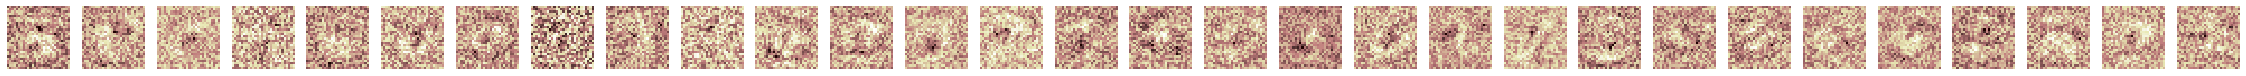

##Embeddings

###Embeddings

An embedding is a translation of a high dimensional vector into a lower dimensional space relative to the vector. i.e. mapping a 1d array of numbers from 1 to 10'000 into a 2 dimensional space would have a 100x100 2d dimension, from 0,0 to 100,100.

This application can also be used for vocabulary, categories, or properties to map objects in dimensional space from a sparse or dense vector.

###Collaborative Filtering

**Collaborative filtering** is an application of embeddings, such as if you have 1'000'000 movies that could be recommended to 500'000 users, with knowledge of what those users have watched previously. Our goal is to recommend movies to users.

So how do we do this? the simplest approach is to dimensionalize movies to each other similarly. 

for example, if a movie is or isnt a blockbuster, if a movie is or isnt aimed at children, if a movie is or isnt high budget, if a movie is or isnt fantasy etc.

If we take the below movies and try to arrange them in one dimension (1D)

|Movie|Rating|Description|
|---|---|---|
|Bleu	|R|	A French widow grieves the loss of her husband and daughter after they perish in a car accident.|
|The Dark Knight Rises|	PG-13|	Batman endeavors to save Gotham City from nuclear annihilation in this sequel to The Dark Knight, set in the DC Comics universe.|
|Harry Potter and the Sorcerer's Stone|	PG|	A orphaned boy discovers he is a wizard and enrolls in Hogwarts School of Witchcraft and Wizardry, where he wages his first battle against the evil Lord Voldemort.|
|The Incredibles|	PG|	A family of superheroes forced to live as civilians in suburbia come out of retirement to save the superhero race from Syndrome and his killer robot.|
|Shrek|	PG|	A lovable ogre and his donkey sidekick set off on a mission to rescue Princess Fiona, who is emprisoned in her castle by a dragon.|
|Star Wars|	PG|	Luke Skywalker and Han Solo team up with two androids to rescue Princess Leia and save the galaxy.|
|The Triplets of Belleville|	PG-13|	When professional cycler Champion is kidnapped during the Tour de France, his grandmother and overweight dog journey overseas to rescue him, with the help of a trio of elderly jazz singers.|
|Memento|	R|	An amnesiac desperately seeks to solve his wife's murder by tattooing clues onto his body.|

we **may** get something like below

|Movie|Rating|Description|
|---|---|---|
|Shrek|	PG|	A lovable ogre and his donkey sidekick set off on a mission to rescue Princess Fiona, who is emprisoned in her castle by a dragon.|
|The Incredibles|	PG|	A family of superheroes forced to live as civilians in suburbia come out of retirement to save the superhero race from Syndrome and his killer robot.|
|Harry Potter and the Sorcerer's Stone|	PG|	A orphaned boy discovers he is a wizard and enrolls in Hogwarts School of Witchcraft and Wizardry, where he wages his first battle against the evil Lord Voldemort.|
|Star Wars|	PG|	Luke Skywalker and Han Solo team up with two androids to rescue Princess Leia and save the galaxy.|
|The Triplets of Belleville|	PG-13|	When professional cycler Champion is kidnapped during the Tour de France, his grandmother and overweight dog journey overseas to rescue him, with the help of a trio of elderly jazz singers.|
|The Dark Knight Rises|	PG-13|	Batman endeavors to save Gotham City from nuclear annihilation in this sequel to The Dark Knight, set in the DC Comics universe.|
|Bleu	|R|	A French widow grieves the loss of her husband and daughter after they perish in a car accident.|
|Memento|	R|	An amnesiac desperately seeks to solve his wife's murder by tattooing clues onto his body.|

which is categorised by Rating, Target age, and Medium i.e. 
- Shrek and The Incredibles are PG rated, Younger/Older children targeted, animated films
- Harry Potter and Star Wars are PG Rated, Older children/young adult live action films
- Triplets of belleville is a PG-13 young adult targeted animated film
- Dark night rises is a PG-13 young adult targeted live action film
- Bleu and Memento are R rated adult targeted live action films

now this can be imperfect as we have two R rated films butting up against a PG-13 young adult targeted film, as well as having a fantasy and sci-fi film right next to each other etc. 

To seperate these out we could represent these recomendations in a higher dimension (in this case 2-dimensional)

    Shrek    Harry Potter |   Star Wars
       Incredibles        |           Dark Knight Rises
          School of Rock  |
    ______________________|_____________________ Child <---> Adult
      Wallace and Gromit  |                 Bleu
                          |               
    Triplets of Belleville|               Memento
            Blockbuster <---> Arthouse

This shows a better representation, still showing some of those previous false representations, but giving a better all round experience by moving memento and bleu away from dark knight rises and triplets of belleville


###Categorical Input Data


lets say we pick a random user and view their past watch history of our library of 1 million movies.

during our preprocessing of our data, we index our movies from 0 to 999'999

if they watched 3 movies out of our million, we can create a vector of these indexes [1,3,999] (representing the second, fourth, and 100th movie in our dictionary of movies) in a one-hot or multi-hot encoding representation.

typically an input vector will contain the counts of words in a larger chunk of text. This is known as a **Bag of Words** representation, in which n number of words from text will be nonzero. i.e.** "this is sentence alpha, this is sentence beta"** would turn into 

|this [0]|is [1]|sentence [2]|alpha [3]|beta [4]|
|---|---|---|---|---|
|2|2|2|1|1|

which is represented as [2,2,2,1,1] in our "Bag of Words" representation.

Whatever method to determine nonzero vectors, one-node-per-word gives you very _sparse_ input vectors - very large vectords with very few non-zero values.

sparse representations have a couple of problems that can make it hard for a model tro learn effectively.

some issues to consider could be the 

####Size of network
- **Amount of Data**. the more weights in your model, the more data you need to train it effectively.
- **Amount of Computation**. The more weights, the mnore computation you need to perform. it can be easy to exceed the capabilities of your hardware.

if we have a vocabulary of M words and N number of nodes we have MxN weights in just our first layer.

####Lack of meaningful relations between vectors
if you have a dictionary and the first 3 values are aadvark, aaron, and abacus, it can be difficult to relate these fields together and make future recommendations.

but what if we added dimensionality to these 3 values, such as "animal", "name", or "toy" so that aadvark was dimensionally high in animal, while all others were not, aaron was high dimensionally in name while the others were not, and abacus was high in toy while the others were not. 

this approach creates large "vectors" between positions to seperate categorical data dimensionally.

now if we added Bee, Brian, and Bionicle we can group items close together to like things easily by using features of the data.

an interesting part of this however, is that you can perform maths against this dimensionality to find like terms

i.e. if you have "Paris" as a feature with dimensionality including it's country, you could perform an operation such as "(Paris - France)+(England) = London" 

this approach is called Embedding.

####Dimensionality reduction techniques

There are many mathematical techniques, which could in theory be used for a machine learning system such as PCA. 

Google has however invented an algorithm for training word embeddings, called Word2Vec

Word2vec relies on the **distributional hypothesis** to map similar words to geometrically close vectors.

the distributional hypothesis states that words that have the same neighbouring words tend to be semantically similar. both "Dog" and "Cat" frequently appear close to the word "vet" which reflects their semantic similarity.

Word2Vec exploits contextual information like this by training a neural network to distinguish actually co-occuring groups of words from randomly grouped words. 

The input takes a sparse representation of a target word with one or more context words. the input connects to a single smaller hidden layer.

In one version of the algorithm the system makes negative examples by substituing random noise words for the target word. i.e. given a positive example "the plane flies" the system might swap plane with "jogging" to create a contrasting negative example.

the alternative version creates negative examples by pairing the true target word with randomly chosen context words, i.e. (the, plane),(plane,flies) and the negative examples (compiled,plane),(who,plane) and learn to identify which pairs actually appeared together in text

the classifier is not the real goal for either version of the system however. after the model has been trained, you have an embedding. You can use the weights connecting the input layer with the hidden layer to map sparse representations of words to smaller vectors. this embedding can be reused in other classifiers

####Training an embedding as part of a larger model

you can also learn an embedding as part of a neural network for a target task. this approach gets you a well customized embedding, but may take more computation. 

in general, when you hagve sparse data you can create an embedding unit that is just a special type of hidden unit of size d. this embedding layer can be combined with any other features and hidden layers.

As in any DNN, the final layer will be the loss to optimize. 

Say we were performing collaborative filtering, where the goal is to predict a users interests from the interests of other users. 

We can model this as a supervised learning problem by randomly setting aside a small number of movies that the user has watched as the positive labels, then optimize for softmax loss 


###Intro to sparse data and embeddings

Training set metrics:
accuracy 0.8264
accuracy_baseline 0.5
auc 0.90814805
auc_precision_recall 0.90521187
average_loss 0.3904626
label/mean 0.5
loss 9.761565
precision 0.80092937
prediction/mean 0.5355518
recall 0.86872
global_step 2000
---
Test set metrics:
accuracy 0.8264
accuracy_baseline 0.5
auc 0.90814805
auc_precision_recall 0.90521187
average_loss 0.39046246
label/mean 0.5
loss 9.761561
precision 0.80092937
prediction/mean 0.53555197
recall 0.86872
global_step 2000
---


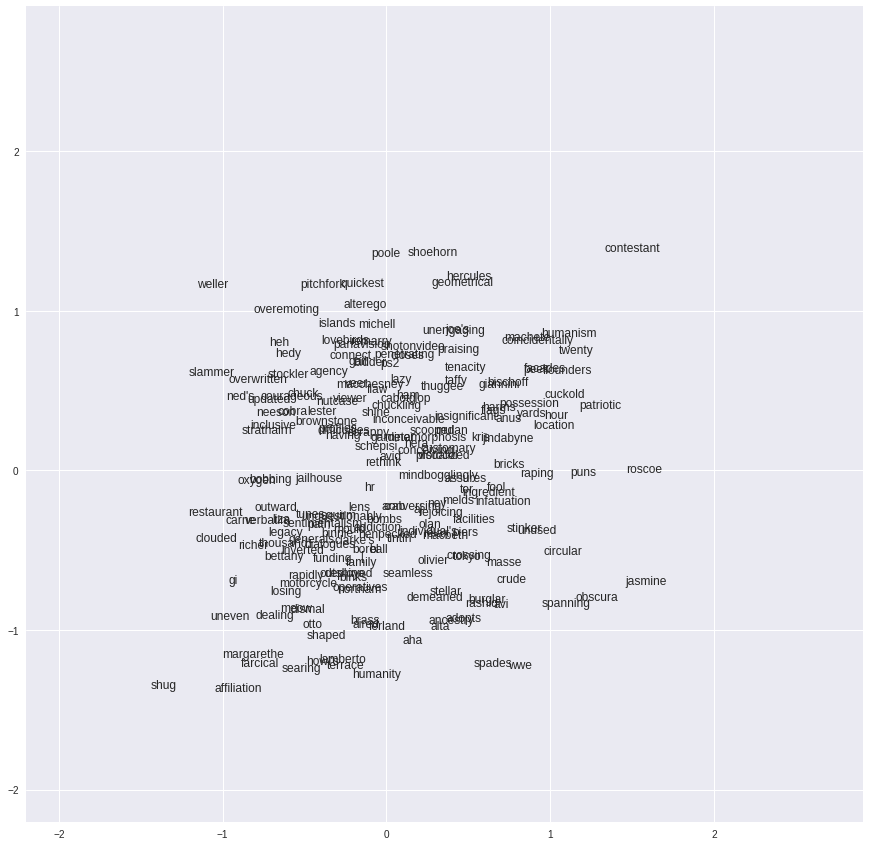

Training set metrics:
accuracy 0.492
accuracy_baseline 0.508
auc 0.57585937
auc_precision_recall 0.5929426
average_loss 0.7134282
label/mean 0.508
loss 17.835705
precision 0.0
prediction/mean 0.40579692
recall 0.0
global_step 10
---
Test set metrics:
accuracy 0.5
accuracy_baseline 0.5
auc 0.57332283
auc_precision_recall 0.5888947
average_loss 0.7100264
label/mean 0.5
loss 17.75066
precision 0.0
prediction/mean 0.40593737
recall 0.0
global_step 10
---


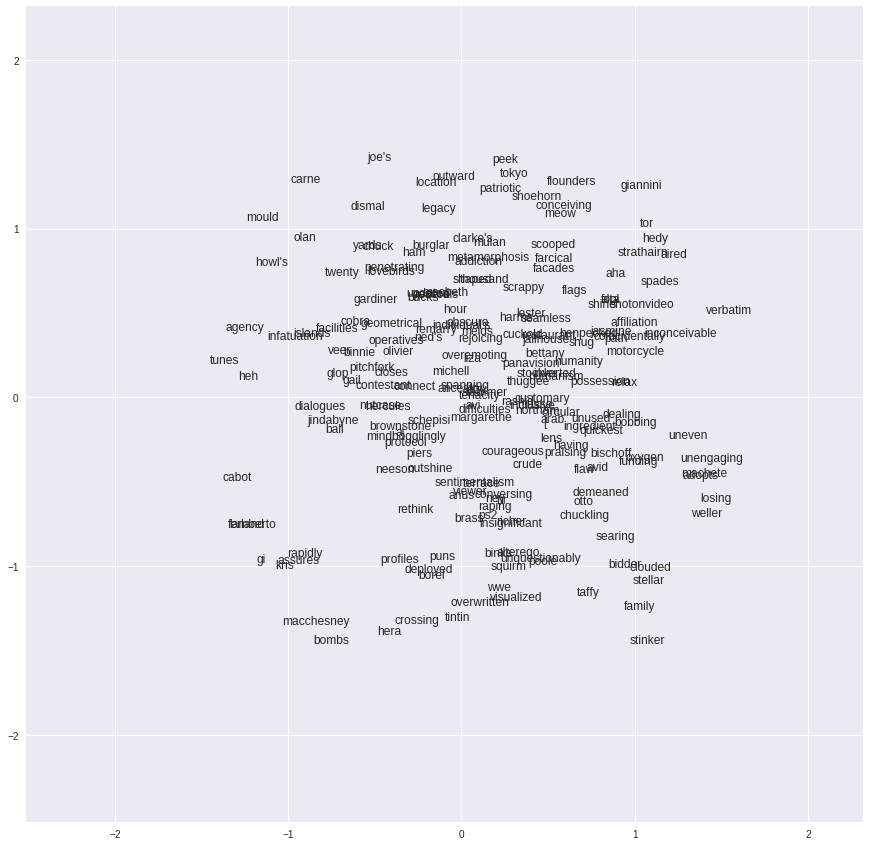

In [0]:
from __future__ import print_function

import collections,io,math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

from IPython import display
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)
train_url = 'https://dl.google.com/mlcc/mledu-datasets/sparse-data-embedding/train.tfrecord'
train_path = tf.keras.utils.get_file(train_url.split('/')[-1], train_url)
test_url = 'https://dl.google.com/mlcc/mledu-datasets/sparse-data-embedding/test.tfrecord'
test_path = tf.keras.utils.get_file(test_url.split('/')[-1], test_url)

terms_url = 'https://dl.google.com/mlcc/mledu-datasets/sparse-data-embedding/terms.txt'
terms_path = tf.keras.utils.get_file(terms_url.split('/')[-1], terms_url)

with io.open(terms_path,'r',encoding='utf8') as f:
  informative_terms = list(set(f.read().split()))

def _parse_function(record):
  features = {
      "terms":tf.VarLenFeature(dtype=tf.string),
      "labels":tf.FixedLenFeature(shape=[1],dtype=tf.float32)
  }  
  
  parsed_features = tf.parse_single_example(record,features)
  terms = parsed_features['terms'].values
  labels = parsed_features['labels']
  
  return {'terms':terms},labels

def _input_fn(input_file_names,num_epochs=None,shuffle=True):
  ds = tf.data.TFRecordDataset(train_path)
  ds = ds.map(_parse_function,3)
  
  if shuffle:
    ds = ds.shuffle(10000)
  
  ds = ds.padded_batch(25,ds.output_shapes)
  ds = ds.repeat(num_epochs)
  
  #ite = ds.make_initializable_iterator()
  #next_element = ite.get_next()

  #sess.run(ite.initializer)
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels
  
def _create_feature_columns():
  feature_cols = []
  terms_col = tf.feature_column.categorical_column_with_vocabulary_list(key="terms", vocabulary_list=informative_terms)
  #feature_cols.append(terms_col)
  #feature_cols.append(tf.feature_column.indicator_column(terms_col))
  terms_embedding_column = tf.feature_column.embedding_column(terms_col, dimension=2)
  feature_cols.append(terms_embedding_column)
  return feature_cols

def _create_dnn_classifier(learning_rate=0.1,steps=1000):
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
  optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer,5.0)
  
  feature_columns = _create_feature_columns()
  
  classifier=tf.estimator.DNNClassifier(feature_columns=feature_columns, optimizer=optimizer,hidden_units=[20,20])
  
  classifier.train(
    input_fn=lambda: _input_fn(train_path),
      steps=steps
  )

  eval_metrics = classifier.evaluate(    
      input_fn=lambda: _input_fn(train_path),
      steps=steps)
  print("Training set metrics:")
  for m in eval_metrics:
    print(m, eval_metrics[m])
  print("---")
  
  eval_metrics = classifier.evaluate(
  input_fn=lambda: _input_fn([test_path]),
  steps=1000)
  
  print("Test set metrics:")
  for m in eval_metrics:
    print(m, eval_metrics[m])
  print("---")
  
  return classifier

def MapEmbedding(embedding_matrix,size):
  copy_informative = [ informative_terms[0:size][i] for i in sorted(random.sample(range(len(informative_terms[0:size])), size)) ]
  
  for term_index in range(len(copy_informative)):
    term_vector = np.zeros(len(copy_informative))
    term_vector[term_index] = 1
    
    embedding_xy = np.matmul(term_vector,embedding_matrix[0:size])
    plt.text(embedding_xy[0],embedding_xy[1],copy_informative[term_index])
  plt.rcParams["figure.figsize"] = (15, 15)
  plt.xlim(1.2 * embedding_matrix.min(), 1.2 * embedding_matrix.max())
  plt.ylim(1.2 * embedding_matrix.min(), 1.2 * embedding_matrix.max())
  plt.show() 
  
with tf.Session() as sess:
  classifier = _create_dnn_classifier(learning_rate=0.001,steps=2000)
  MapEmbedding(classifier.get_variable_value('dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights'),200)
  classifier = _create_dnn_classifier(steps=10)
  MapEmbedding(classifier.get_variable_value('dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights'),200)


In [0]:
classifier.get_variable_names()
classifier.get_variable_value("dnn/input_from_feature_columns/input_layer/terms_embedding/embedding_weights").shape

(50, 2)

['uneven', "individual's", 'crossing', 'gail', 'heh', 'bettany', 'courageous', 'humanity', 'aired', 'roscoe', 'connect', 'unquestionably', 'geometrical', 'weller', 'bricks', 'brass', 'ps2', 'tunes', 'strathairn', 'harms', 'penetrating', 'lamberto', 'slammer', 'farcical', 'ancestry', 'alterego', 'verbatim', 'stinker', 'crude', 'ferland', 'hera', 'stellar', 'deployed', 'hour', 'coincidentally', 'ham', "clarke's", 'tenacity', 'patriotic', 'tintin', 'avid', 'rashid', 'thousand', 'chuckling', 'fool', 'difficulties', 'having', 'humanism', 'otto', 'brownstone', 'carne', 'restaurant', 'conversing', 'machete', 'shotonvideo', 'hr', 'path', 'olivier', 'ingredient', 'flags', 'jindabyne', 'shug', 'jasmine', 'jailhouse', 'pitchfork', 'flounders', "ned's", 'facades', 'binnie', "joe's", 'raping', 'wwe', 'gi', 'agency', 'updated', 'inclusive', 'neeson', 'customary', 'yards', 'mould', 'bombs', 'aha', 'infatuation', 'henpecked', 'kris', 'tor', 'tokyo', 'cobra', 'location', 'possession', 'alta', 'ney', 'o

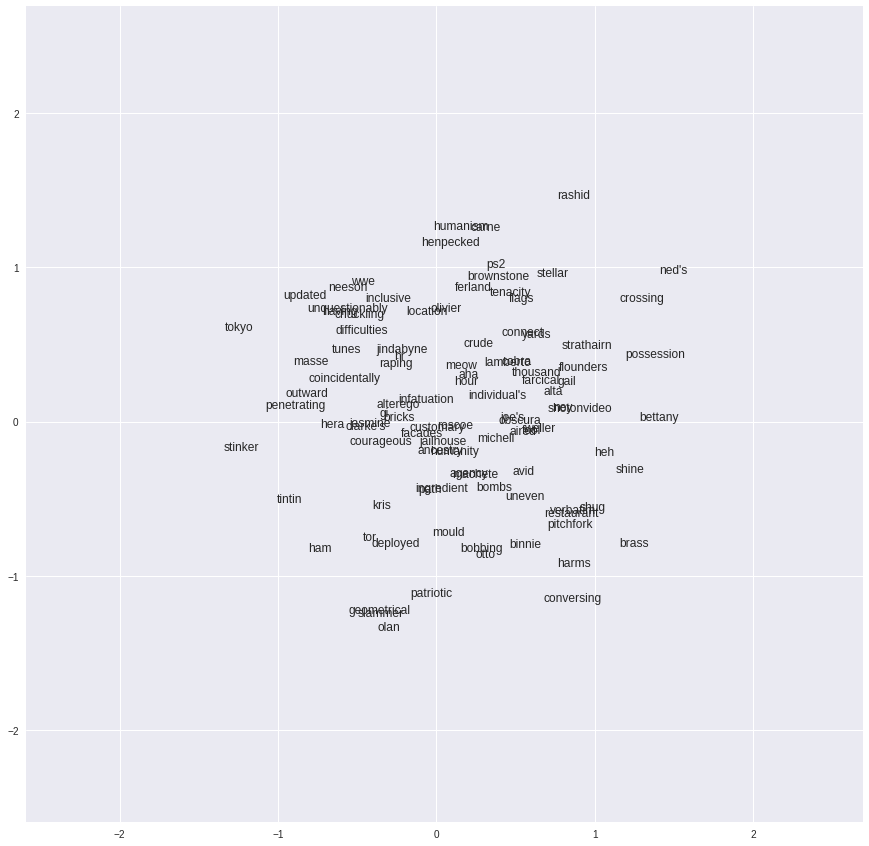

##ML Systems in the real world

###Guidelines

**KISS (keep it simple, stupid)**. 
When you first design your system, start off with a linear model. make sure your data pipeline is correct, and make sure you use simple and observable metrics

**Own and Monitor** your input features, try to reduce data dependencies etc.

**Treat your model configuration like code**. review your config, check it in to source control etc.

**Write down the results of all experiments** ESPECIALLY failures